# **Problem Statement**

## Business Context

Renewable energy sources play an increasingly important role in the global energy mix, as the effort to reduce the environmental impact of energy production increases.

Out of all the renewable energy alternatives, wind energy is one of the most developed technologies worldwide. The U.S Department of Energy has put together a guide to achieving operational efficiency using predictive maintenance practices.

Predictive maintenance uses sensor information and analysis methods to measure and predict degradation and future component capability. The idea behind predictive maintenance is that failure patterns are predictable and if component failure can be predicted accurately and the component is replaced before it fails, the costs of operation and maintenance will be much lower.

The sensors fitted across different machines involved in the process of energy generation collect data related to various environmental factors (temperature, humidity, wind speed, etc.) and additional features related to various parts of the wind turbine (gearbox, tower, blades, break, etc.).

## Objective

“ReneWind” is a company working on improving the machinery/processes involved in the production of wind energy using machine learning and has collected data of generator failure of wind turbines using sensors. They have shared a ciphered version of the data, as the data collected through sensors is confidential (the type of data collected varies with companies). Data has 40 predictors, 20000 observations in the training set and 5000 in the test set.

The objective is to build various classification models, tune them, and find the best one that will help identify failures so that the generators could be repaired before failing/breaking to reduce the overall maintenance cost.
The nature of predictions made by the classification model will translate as follows:

- True positives (TP) are failures correctly predicted by the model. These will result in repairing costs.
- False negatives (FN) are real failures where there is no detection by the model. These will result in replacement costs.
- False positives (FP) are detections where there is no failure. These will result in inspection costs.

It is given that the cost of repairing a generator is much less than the cost of replacing it, and the cost of inspection is less than the cost of repair.

“1” in the target variables should be considered as “failure” and “0” represents “No failure”.

## Data Description

The data provided is a transformed version of the original data which was collected using sensors.

- Train.csv - To be used for training and tuning of models.
- Test.csv - To be used only for testing the performance of the final best model.

Both the datasets consist of 40 predictor variables and 1 target variable.

# **Installing and Importing the necessary libraries**

In [189]:
# Installing the libraries with the specified version
!pip install --no-deps tensorflow==2.18.0 scikit-learn==1.3.2 matplotlib===3.8.3 seaborn==0.13.2 numpy==1.26.4 pandas==2.2.2 -q --user --no-warn-script-location

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 615.5/615.5 MB 741.1 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 96.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 84.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.0/18.0 MB 52.7 MB/s eta 0:00:00


**Note**:
- After running the above cell, kindly restart the runtime (for Google Colab) or notebook kernel (for Jupyter Notebook), and run all cells sequentially from the next cell.
- On executing the above line of code, you might see a warning regarding package dependencies. This error message can be ignored as the above code ensures that all necessary libraries and their dependencies are maintained to successfully execute the code in ***this notebook***.

In [190]:
# Libraries for data reading and manipulation
import pandas as pd
import numpy as np

# Libraries to visualize the data
import matplotlib.pyplot as plt
import seaborn as sns

# Library for time functions
import time

# Libraries to preprocess the data
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix, classification_report
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler


# Libraries to build and tune models
import tensorflow as tf
from tensorflow.keras import regularizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import SGD, Adam, Adamax, Adagrad, Adadelta, RMSprop
from sklearn.utils import class_weight


pd.set_option('display.max_columns', None)

import random

# to suppress unnecessary warnings
import warnings
warnings.filterwarnings("ignore")

# **Loading the Data**

In [20]:
# uncomment and run the following lines for Google Colab
# from google.colab import drive
# drive.mount('/content/drive')

In [191]:
# Import the data set
df = pd.read_csv('Train.csv')

In [192]:
# Create a copy of the dataset to avoid making changes to the original data
data = df.copy()

# **Data Overview**

#### View the first and last 5 rows of the dataset

In [22]:
# Get the first 5 rows in the dataset
data.head()

V1        V2        V3        V4        V5        V6        V7  \
0 -4.464606 -4.679129  3.101546  0.506130 -0.221083 -2.032511 -2.910870   
1  3.365912  3.653381  0.909671 -1.367528  0.332016  2.358938  0.732600   
2 -3.831843 -5.824444  0.634031 -2.418815 -1.773827  1.016824 -2.098941   
3  1.618098  1.888342  7.046143 -1.147285  0.083080 -1.529780  0.207309   
4 -0.111440  3.872488 -3.758361 -2.982897  3.792714  0.544960  0.205433   

         V8        V9       V10       V11       V12       V13       V14  \
0  0.050714 -1.522351  3.761892 -5.714719  0.735893  0.981251  1.417884   
1 -4.332135  0.565695 -0.101080  1.914465 -0.951458 -1.255259 -2.706522   
2 -3.173204 -2.081860  5.392621 -0.770673  1.106718  1.144261  0.943301   
3 -2.493629  0.344926  2.118578 -3.053023  0.459719  2.704527 -0.636086   
4  4.848994 -1.854920 -6.220023  1.998347  4.723757  0.709113 -1.989432   

        V15       V16       V17       V18       V19       V20       V21  \
0 -3.375815 -3.047303  0.306194  2.914097  2.269979  4.394876 -2.388299   
1  0.193223 -4.769379 -2.205319  0.907716  0.756894 -5.833678 -3.065122   
2 -3.163804 -4.247825 -4.038909  3.688534  3.311196  1.059002 -2.143026   
3 -0.453717 -3.174046 -3.404347 -1.281536  1.582104 -1.951778 -3.516555   
4 -2.632684  4.184447  2.245356  3.734452 -6.312766 -5.379918 -0.886667   

        V22       V23       V24       V25       V26       V27       V28  \
0  0.646388 -1.190508  3.132986  0.665277 -2.510846 -0.036744  0.726218   
1  1.596647 -1.757311  1.766444 -0.267098  3.625036  1.500346 -0.585712   
2  1.650120 -1.660592  1.679910 -0.450782 -4.550695  3.738779  1.134404   
3 -1.206011 -5.627854 -1.817653  2.124142  5.294642  4.748137 -2.308536   
4  2.061694  9.445586  4.489976 -3.945144  4.582065 -8.780422 -3.382967   

        V29       V30       V31       V32       V33        V34       V35  \
0 -3.982187 -1.072638  1.667098  3.059700 -1.690440   2.846296  2.235198   
1  0.783034 -0.201217  0.024883 -1.795474  3.032780  -2.467514  1.894599   
2 -2.033531  0.840839 -1.600395 -0.257101  0.803550   4.086219  2.292138   
3 -3.962977 -6.028730  4.948770 -3.584425 -2.577474   1.363769  0.622714   
4  5.106507  6.787513  2.044184  8.265896  6.629213 -10.068689  1.222987   

        V36       V37       V38       V39       V40  Target  
0  6.667486  0.443809 -2.369169  2.950578 -3.480324       0  
1 -2.297780 -1.731048  5.908837 -0.386345  0.616242       0  
2  5.360850  0.351993  2.940021  3.839160 -4.309402       0  
3  5.550100 -1.526796  0.138853  3.101430 -1.277378       0  
4 -3.229763  1.686909 -2.163896 -3.644622  6.510338       0

In [23]:
# Get the last 5 rows in the dataset
data.tail()

V1         V2        V3        V4        V5        V6        V7  \
19995 -2.071318  -1.088279 -0.796174 -3.011720 -2.287540  2.807310  0.481428   
19996  2.890264   2.483069  5.643919  0.937053 -1.380870  0.412051 -1.593386   
19997 -3.896979  -3.942407 -0.351364 -2.417462  1.107546 -1.527623 -3.519882   
19998 -3.187322 -10.051662  5.695955 -4.370053 -5.354758 -1.873044 -3.947210   
19999 -2.686903   1.961187  6.137088  2.600133  2.657241 -4.290882 -2.344267   

             V8        V9       V10       V11       V12       V13       V14  \
19995  0.105171 -0.586599 -2.899398  8.868415  1.717155  1.357838 -1.777135   
19996 -5.762498  2.150096  0.272302 -2.094760 -1.525834  0.071573 -3.540142   
19997  2.054792 -0.233996 -0.357687 -3.781972  2.180042  6.111780  1.984747   
19998  0.679420 -2.389254  5.456756  1.583029  3.571478  9.226573  2.553587   
19999  0.974004 -1.027462  0.497421 -9.589075  3.176560  1.054517 -1.415882   

            V15        V16       V17       V18       V19       V20       V21  \
19995  0.709780   4.944939 -3.100454 -1.199228 -1.084629 -0.365044  3.131175   
19996 -2.762006 -10.632206 -0.495236  1.720074  3.871596 -1.209610 -8.222073   
19997 -8.330002  -1.639184 -0.914960  5.672348 -3.924200  2.133196 -4.502031   
19998 -7.039109  -0.993573 -9.664938  1.155224  3.876895  3.523634 -7.015329   
19999 -4.668611  -5.405377  3.719759  2.892923  2.328591  1.457704 -6.428543   

            V22       V23       V24       V25       V26       V27       V28  \
19995 -3.948103 -3.578469 -8.139067 -1.936861 -1.327691 -0.402688 -1.734796   
19996  2.120866 -5.491808  1.452340  1.450002  3.684654  1.076760 -0.384175   
19997  2.777178  5.727949  1.619818 -1.699691 -0.041882 -2.923094 -2.760158   
19998 -0.132037 -3.446179 -4.801443 -0.875727 -3.811854  5.422077 -3.732322   
19999  1.818232  0.805897  7.786026  0.330857  5.257424 -4.867417 -0.818941   

            V29       V30       V31       V32       V33       V34       V35  \
19995  9.996461  6.955367 -3.938493 -8.273996  5.745013  0.589014 -0.649988   
19996 -0.838593 -0.748275 -1.088553 -4.159092  1.181466 -0.742412  5.368979   
19997 -2.253766  2.552033  0.981858  7.112162  1.476080 -3.953710  1.855555   
19998  0.608811  5.256460  1.914766  0.402812  3.163661  3.752095  8.529894   
19999 -5.667393 -2.860975  4.674280  6.620811 -1.988786 -1.348901  3.951801   

            V36       V37       V38       V39       V40  Target  
19995 -3.043174  2.216461  0.608723  0.178193  2.927755       1  
19996 -0.693028 -1.668971  3.659954  0.819863 -1.987265       0  
19997  5.029209  2.082588 -6.409304  1.477138 -0.874148       0  
19998  8.450626  0.203958 -7.129918  4.249394 -6.112267       0  
19999  5.449706 -0.455411 -2.202056  1.678229 -1.974413       0

#### Understand the shape of the database

In [24]:
# Get the shape of the datast
data.shape

(20000, 41)

There are 20000 rows in the dataset with data spread across 41 columns

#### Check the data types of the columns in the dataset

In [25]:
# Get the information of the columns in the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 41 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      19982 non-null  float64
 1   V2      19982 non-null  float64
 2   V3      20000 non-null  float64
 3   V4      20000 non-null  float64
 4   V5      20000 non-null  float64
 5   V6      20000 non-null  float64
 6   V7      20000 non-null  float64
 7   V8      20000 non-null  float64
 8   V9      20000 non-null  float64
 9   V10     20000 non-null  float64
 10  V11     20000 non-null  float64
 11  V12     20000 non-null  float64
 12  V13     20000 non-null  float64
 13  V14     20000 non-null  float64
 14  V15     20000 non-null  float64
 15  V16     20000 non-null  float64
 16  V17     20000 non-null  float64
 17  V18     20000 non-null  float64
 18  V19     20000 non-null  float64
 19  V20     20000 non-null  float64
 20  V21     20000 non-null  float64
 21  V22     20000 non-null  float64
 22

* All the 40 independent variables are of type float
* The target column is of type integer
* Columns V1 and V2 have null value in 18 records

# **Exploratory Data Analysis**

#### Check the statistical summary of the data

In [26]:
# Get the statistical summary of all the columns in the dataset
data.describe().T

count      mean       std        min       25%       50%       75%  \
V1      19982.0 -0.271996  3.441625 -11.876451 -2.737146 -0.747917  1.840112   
V2      19982.0  0.440430  3.150784 -12.319951 -1.640674  0.471536  2.543967   
V3      20000.0  2.484699  3.388963 -10.708139  0.206860  2.255786  4.566165   
V4      20000.0 -0.083152  3.431595 -15.082052 -2.347660 -0.135241  2.130615   
V5      20000.0 -0.053752  2.104801  -8.603361 -1.535607 -0.101952  1.340480   
V6      20000.0 -0.995443  2.040970 -10.227147 -2.347238 -1.000515  0.380330   
V7      20000.0 -0.879325  1.761626  -7.949681 -2.030926 -0.917179  0.223695   
V8      20000.0 -0.548195  3.295756 -15.657561 -2.642665 -0.389085  1.722965   
V9      20000.0 -0.016808  2.160568  -8.596313 -1.494973 -0.067597  1.409203   
V10     20000.0 -0.012998  2.193201  -9.853957 -1.411212  0.100973  1.477045   
V11     20000.0 -1.895393  3.124322 -14.832058 -3.922404 -1.921237  0.118906   
V12     20000.0  1.604825  2.930454 -12.948007 -0.396514  1.507841  3.571454   
V13     20000.0  1.580486  2.874658 -13.228247 -0.223545  1.637185  3.459886   
V14     20000.0 -0.950632  1.789651  -7.738593 -2.170741 -0.957163  0.270677   
V15     20000.0 -2.414993  3.354974 -16.416606 -4.415322 -2.382617 -0.359052   
V16     20000.0 -2.925225  4.221717 -20.374158 -5.634240 -2.682705 -0.095046   
V17     20000.0 -0.134261  3.345462 -14.091184 -2.215611 -0.014580  2.068751   
V18     20000.0  1.189347  2.592276 -11.643994 -0.403917  0.883398  2.571770   
V19     20000.0  1.181808  3.396925 -13.491784 -1.050168  1.279061  3.493299   
V20     20000.0  0.023608  3.669477 -13.922659 -2.432953  0.033415  2.512372   
V21     20000.0 -3.611252  3.567690 -17.956231 -5.930360 -3.532888 -1.265884   
V22     20000.0  0.951835  1.651547 -10.122095 -0.118127  0.974687  2.025594   
V23     20000.0 -0.366116  4.031860 -14.866128 -3.098756 -0.262093  2.451750   
V24     20000.0  1.134389  3.912069 -16.387147 -1.468062  0.969048  3.545975   
V25     20000.0 -0.002186  2.016740  -8.228266 -1.365178  0.025050  1.397112   
V26     20000.0  1.873785  3.435137 -11.834271 -0.337863  1.950531  4.130037   
V27     20000.0 -0.612413  4.368847 -14.904939 -3.652323 -0.884894  2.189177   
V28     20000.0 -0.883218  1.917713  -9.269489 -2.171218 -0.891073  0.375884   
V29     20000.0 -0.985625  2.684365 -12.579469 -2.787443 -1.176181  0.629773   
V30     20000.0 -0.015534  3.005258 -14.796047 -1.867114  0.184346  2.036229   
V31     20000.0  0.486842  3.461384 -13.722760 -1.817772  0.490304  2.730688   
V32     20000.0  0.303799  5.500400 -19.876502 -3.420469  0.052073  3.761722   
V33     20000.0  0.049825  3.575285 -16.898353 -2.242857 -0.066249  2.255134   
V34     20000.0 -0.462702  3.183841 -17.985094 -2.136984 -0.255008  1.436935   
V35     20000.0  2.229620  2.937102 -15.349803  0.336191  2.098633  4.064358   
V36     20000.0  1.514809  3.800860 -14.833178 -0.943809  1.566526  3.983939   
V37     20000.0  0.011316  1.788165  -5.478350 -1.255819 -0.128435  1.175533   
V38     20000.0 -0.344025  3.948147 -17.375002 -2.987638 -0.316849  2.279399   
V39     20000.0  0.890653  1.753054  -6.438880 -0.272250  0.919261  2.057540   
V40     20000.0 -0.875630  3.012155 -11.023935 -2.940193 -0.920806  1.119897   
Target  20000.0  0.055500  0.228959   0.000000  0.000000  0.000000  0.000000   

              max  
V1      15.493002  
V2      13.089269  
V3      17.090919  
V4      13.236381  
V5       8.133797  
V6       6.975847  
V7       8.006091  
V8      11.679495  
V9       8.137580  
V10      8.108472  
V11     11.826433  
V12     15.080698  
V13     15.419616  
V14      5.670664  
V15     12.246455  
V16     13.583212  
V17     16.756432  
V18     13.179863  
V19     13.237742  
V20     16.052339  
V21     13.840473  
V22      7.409856  
V23     14.458734  
V24     17.163291  
V25      8.223389  
V26     16.836410  
V27     17.560404  
V28      6.527643  
V29     10.722055  
V30     12.505812  
V31     17.255090  
V32     2

* Mean of the target variable is about 0.05
* More than 75% of the records have target variable with value as 0
* The dataset appears to be highliy imbalanced with majority of the records with value of target variable as 0
* Lot of columns appear to have negative values, but the values might be correct, cosidering no information has been provided about the kind of data represented by each column
* The data doesn't appear to be scaled as the mean is not close to 0 and standard deviation is not close to 1

## Univariate analysis

In [27]:
# Function to generate boxplot and histogram for given features in the dataset
def boxplot_histogram(data, features, figsize=(12, 6), kde=True, bins=None):
    '''
    Draw the plots while sharing the same row for given features to generate plots for the features side by side,
    and sharing same column to draw the box plot and histogram for a given feature
    '''
    fig, axes = plt.subplots(nrows=2, ncols=len(features), sharex='col', gridspec_kw={"height_ratios": (0.25, 0.75)}, figsize=figsize)

    for i, feature in enumerate(features):
        sns.boxplot(data=data, x=feature, ax=axes[0, i], showmeans=True, color="violet")
        sns.histplot(data=data, x=feature, ax=axes[1, i], kde=kde)

        axes[1, i].axvline(data[feature].mean(), color='black', linestyle='-')
        axes[1, i].axvline(data[feature].median(), color='red', linestyle='-.')
        axes[0, i].set_title(feature) # Add title to each subplot

    plt.tight_layout()
    plt.show()

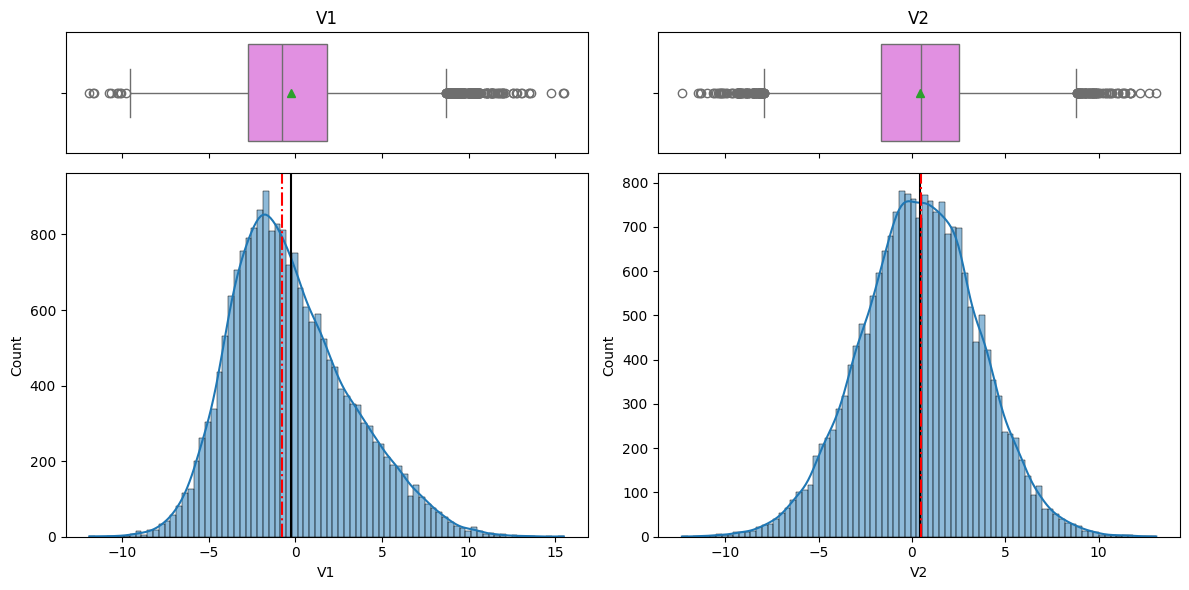

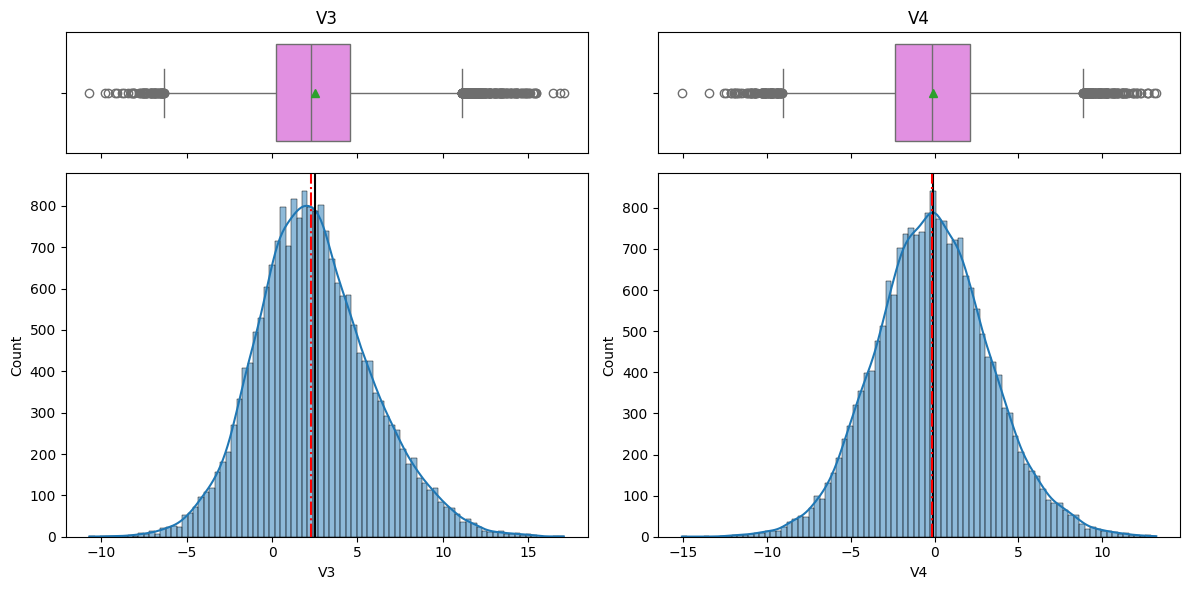

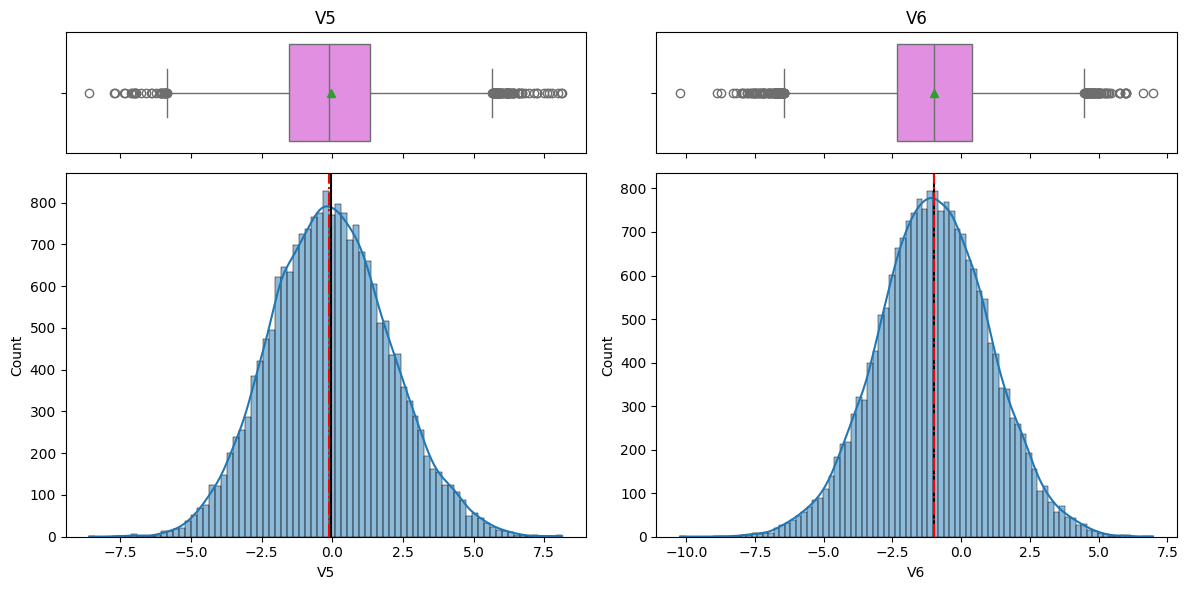

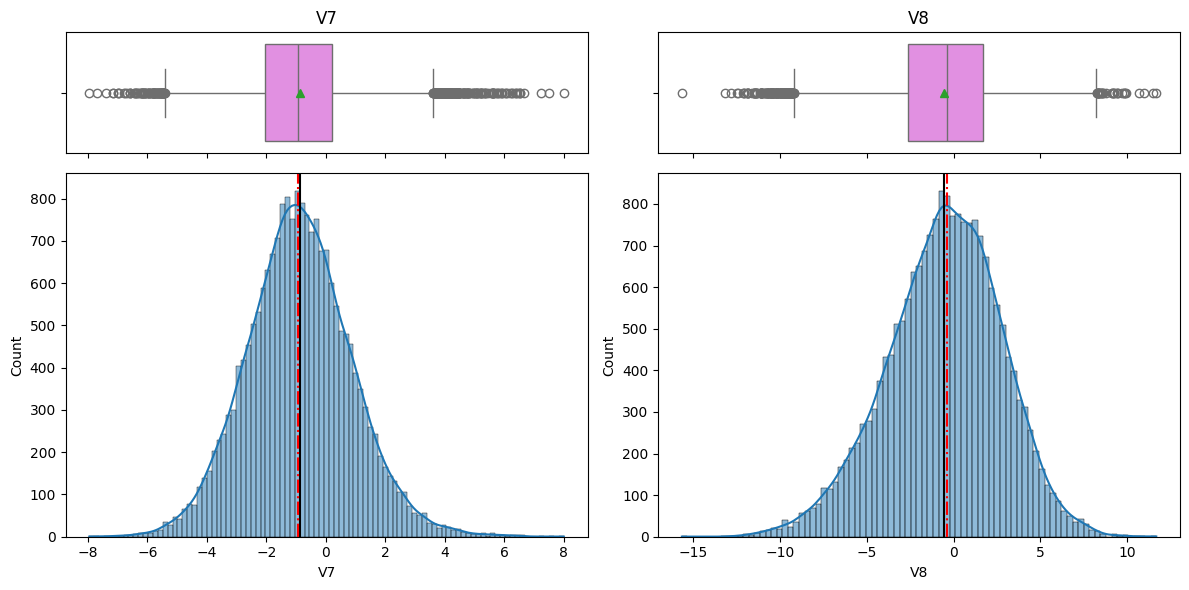

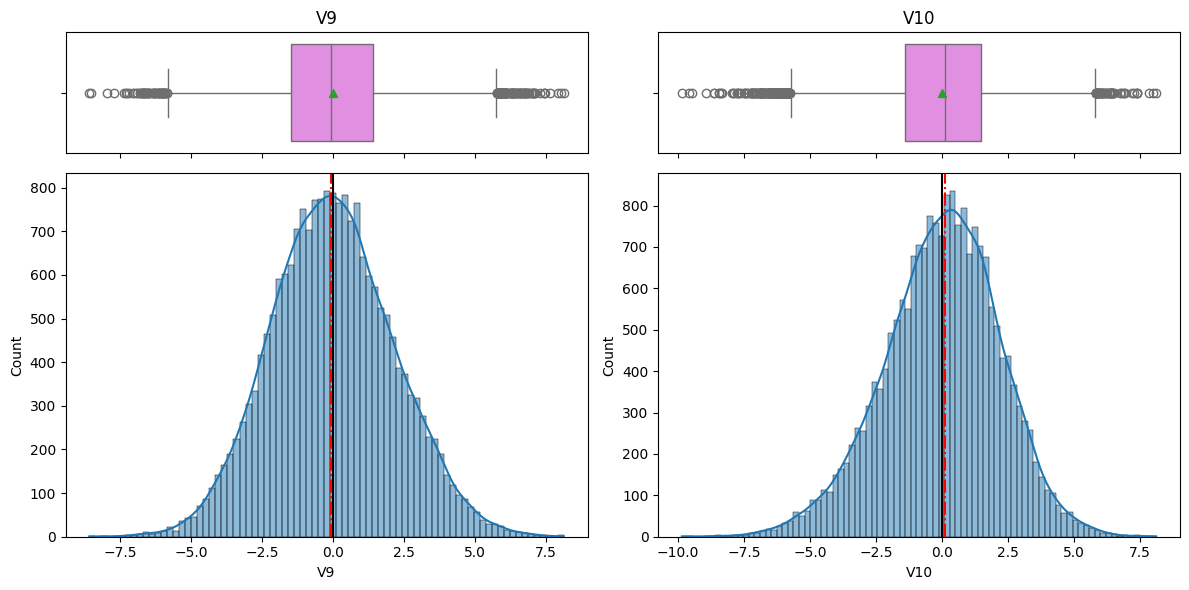

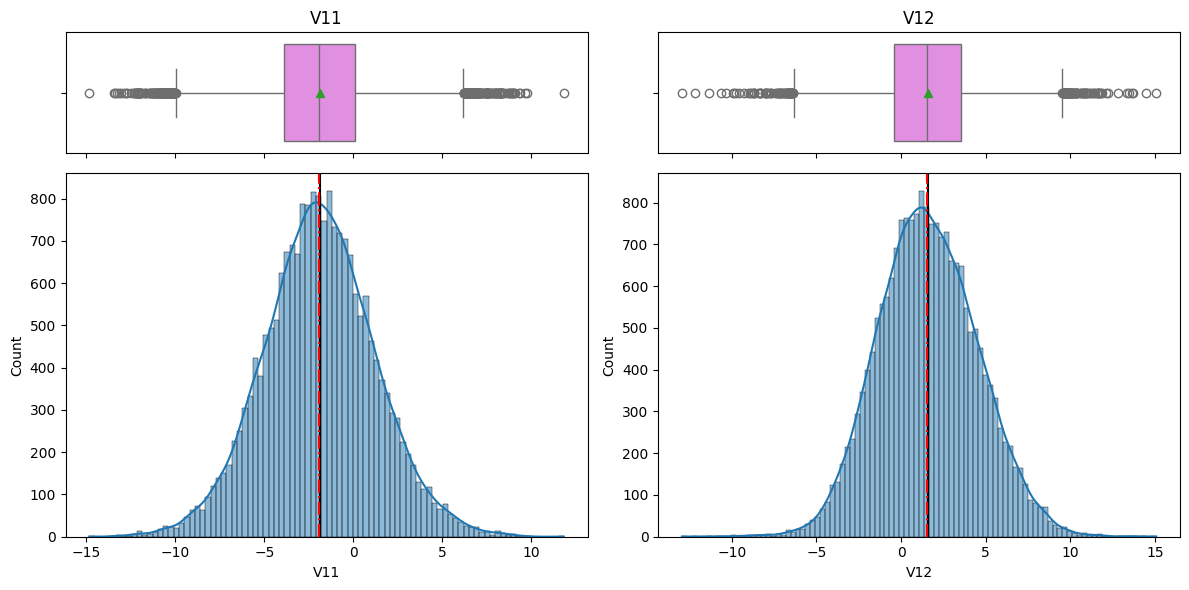

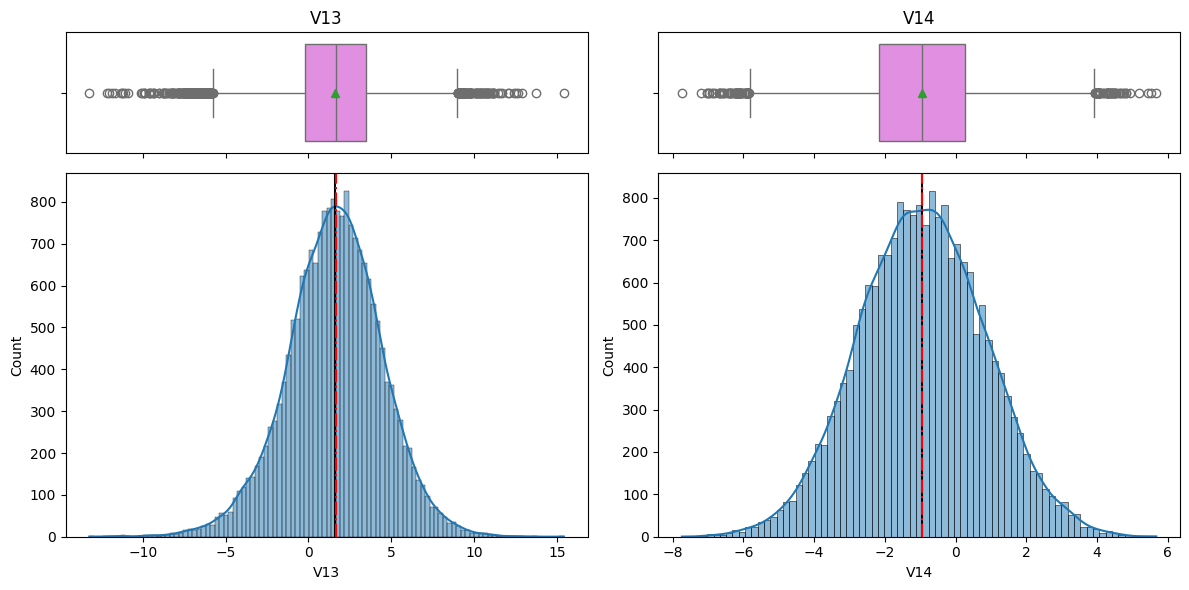

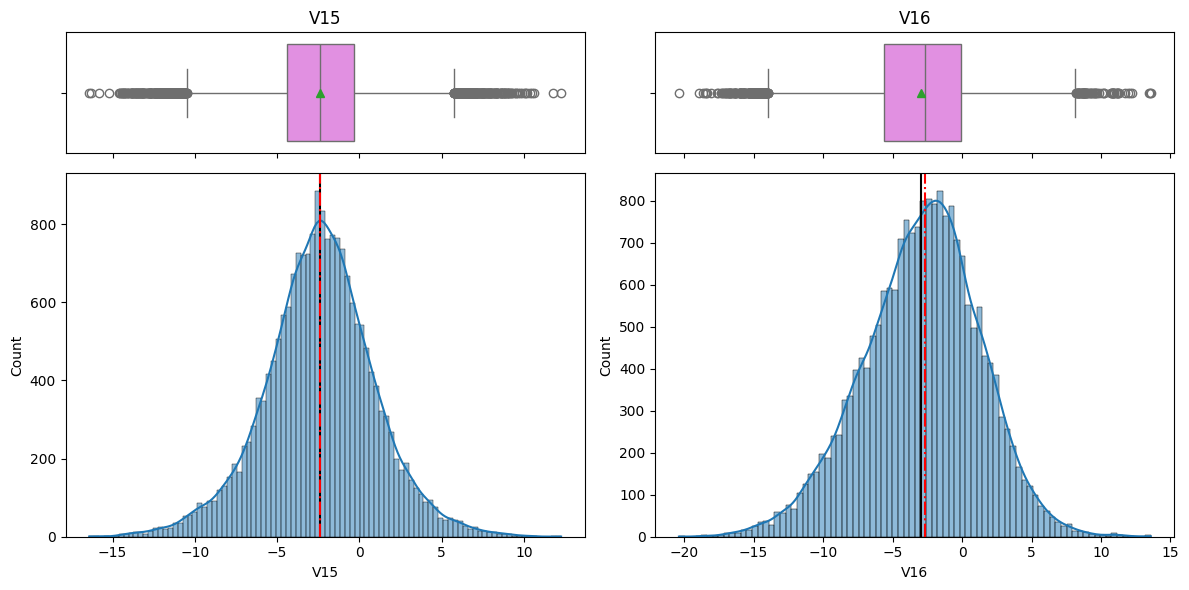

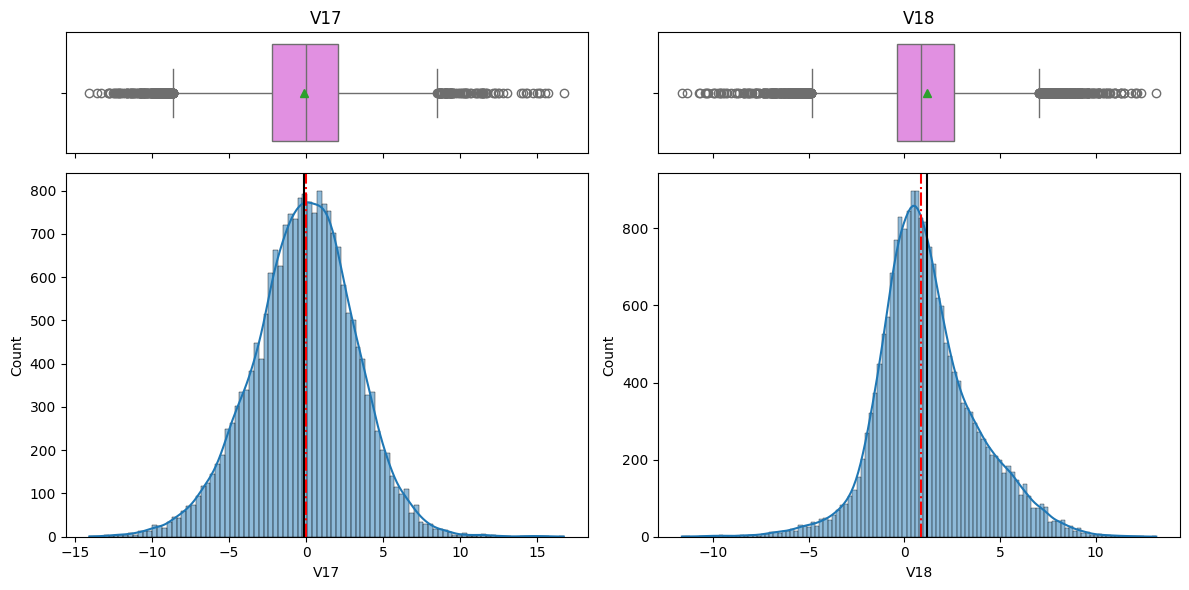

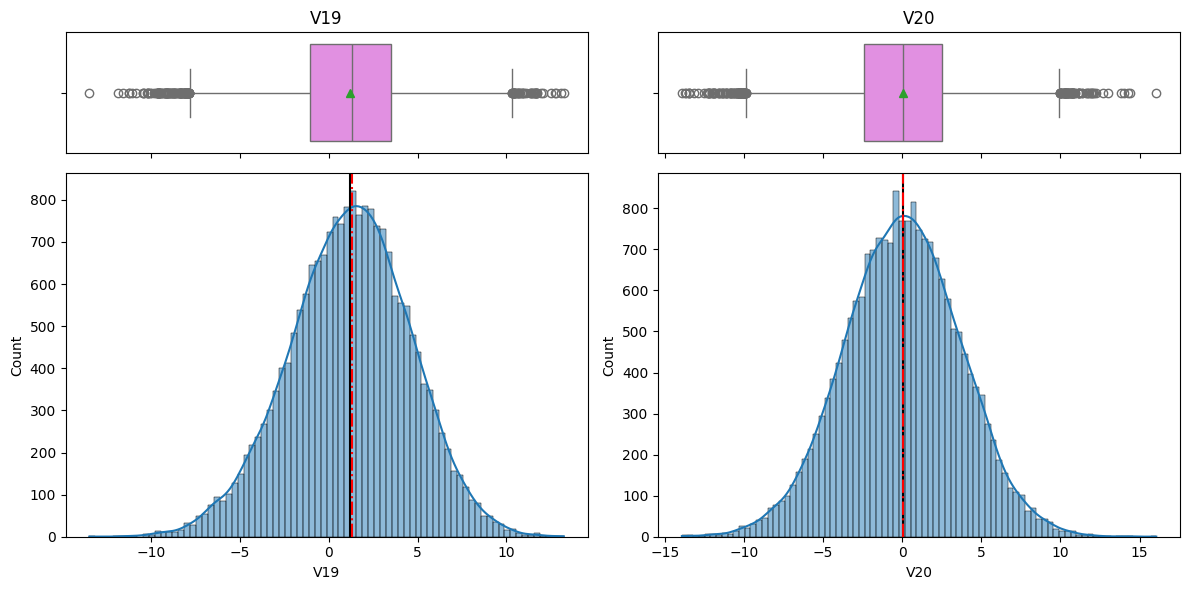

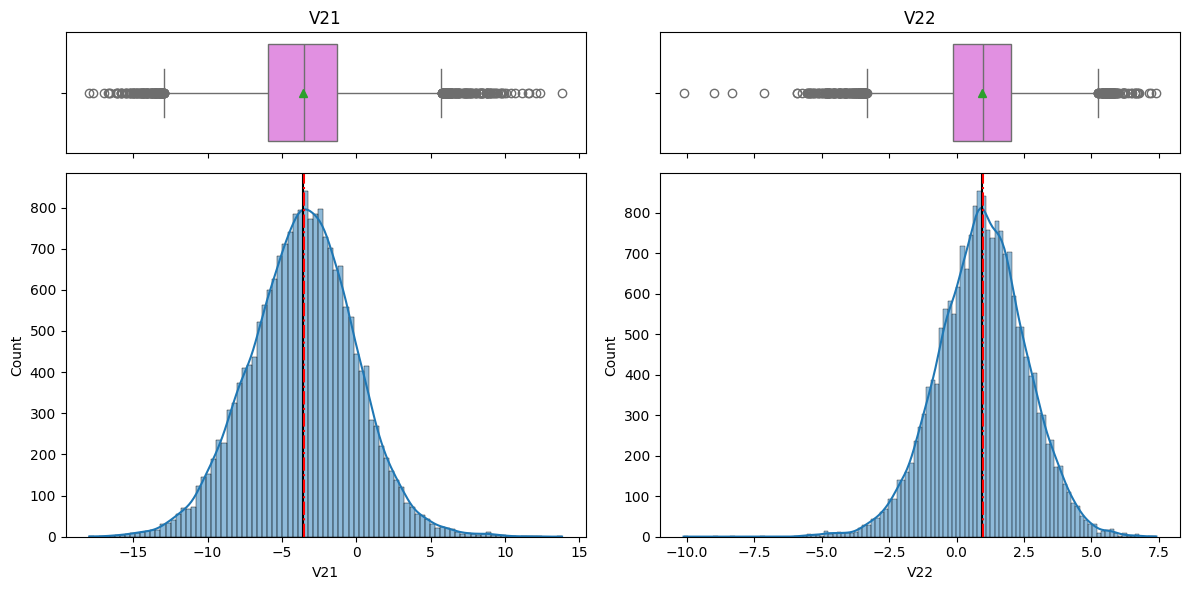

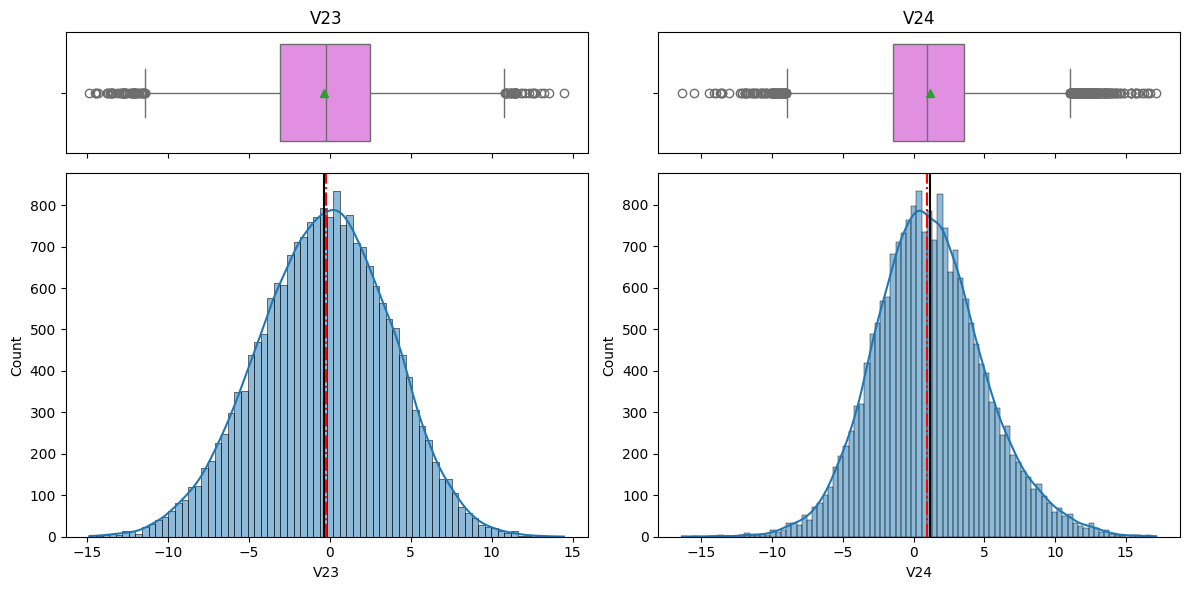

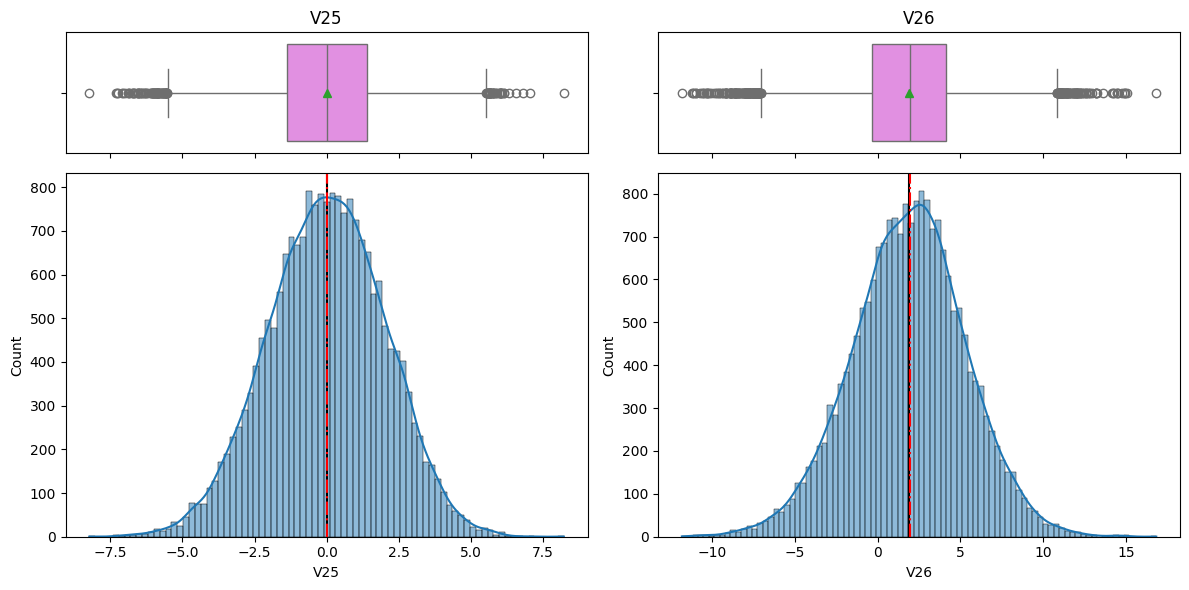

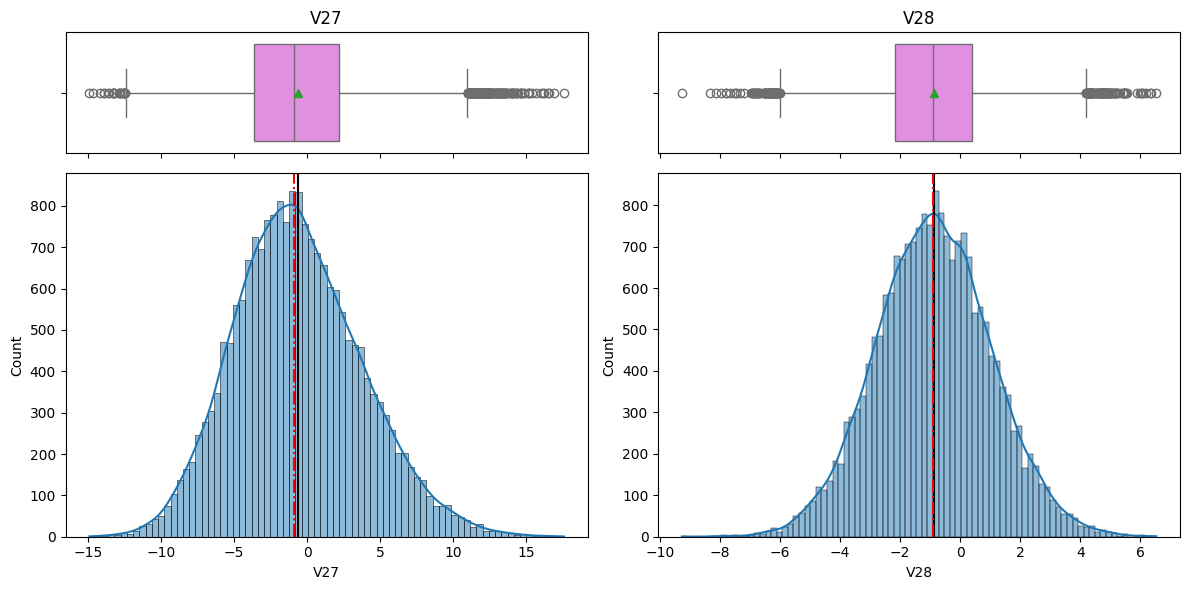

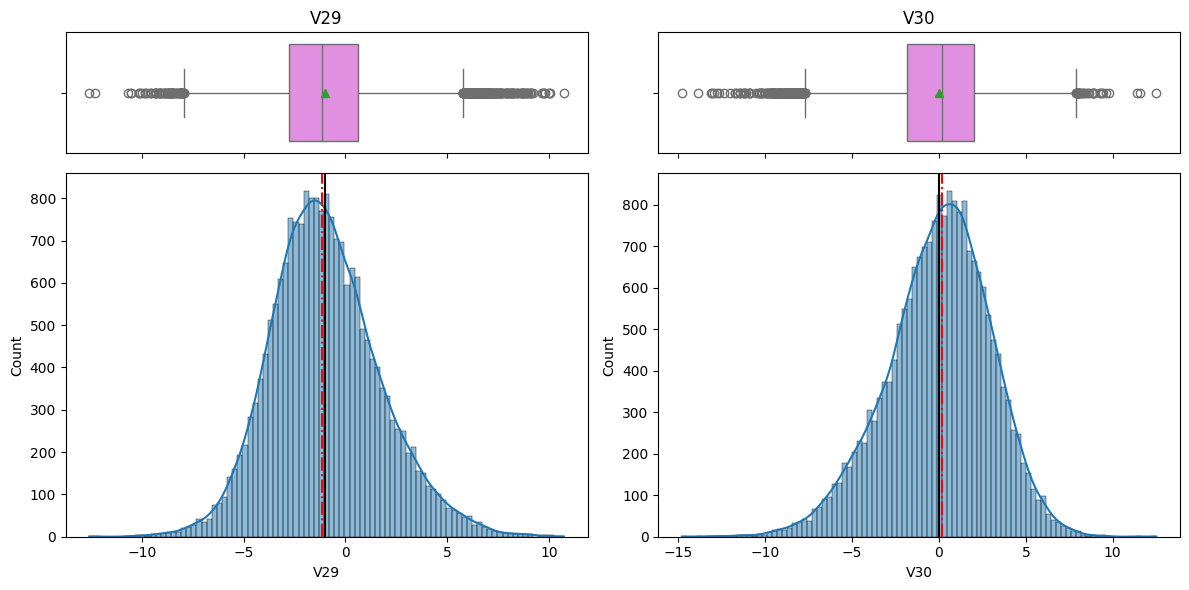

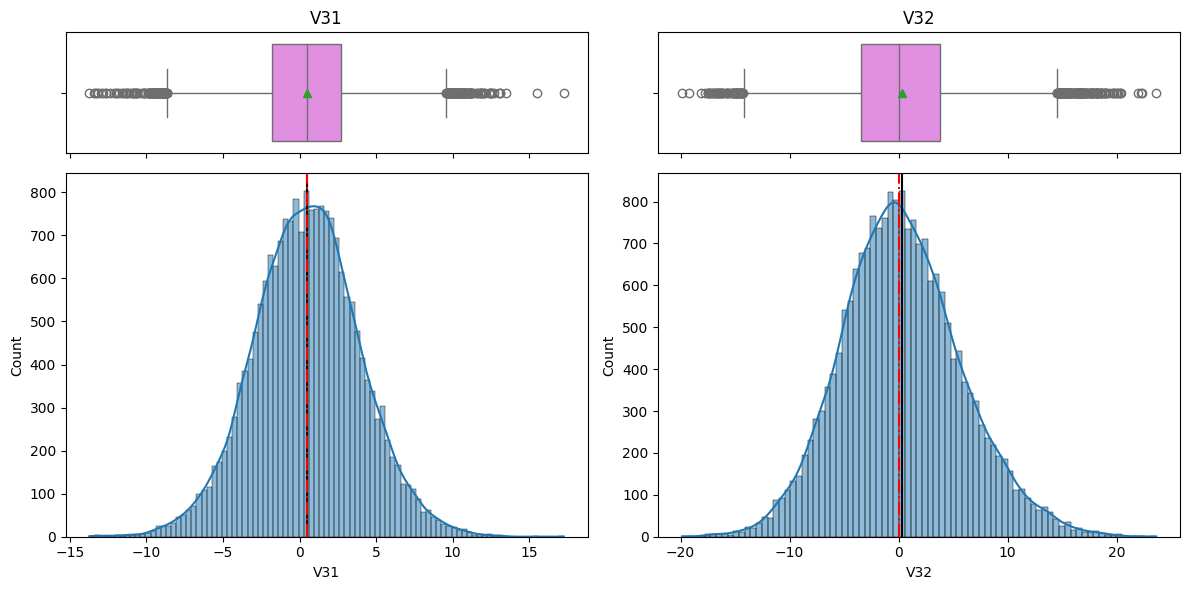

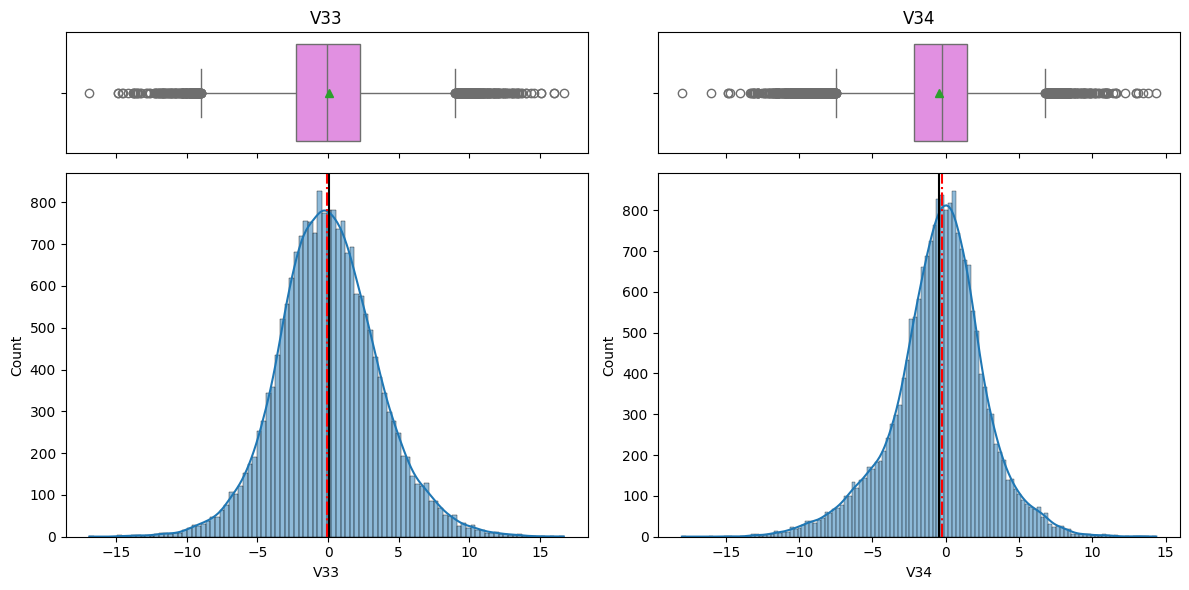

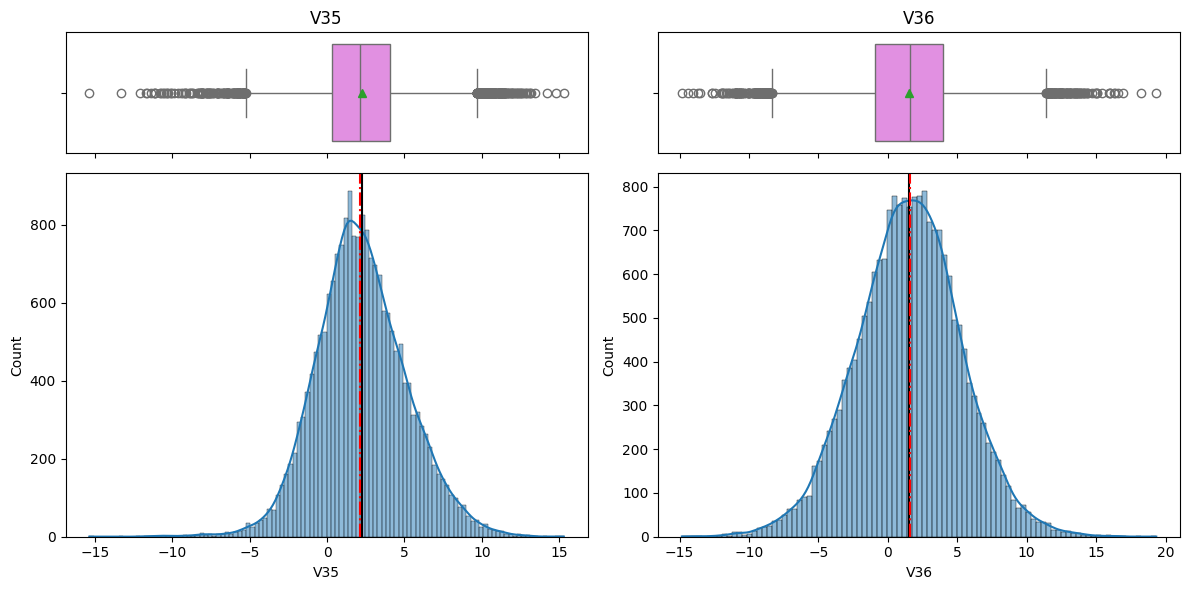

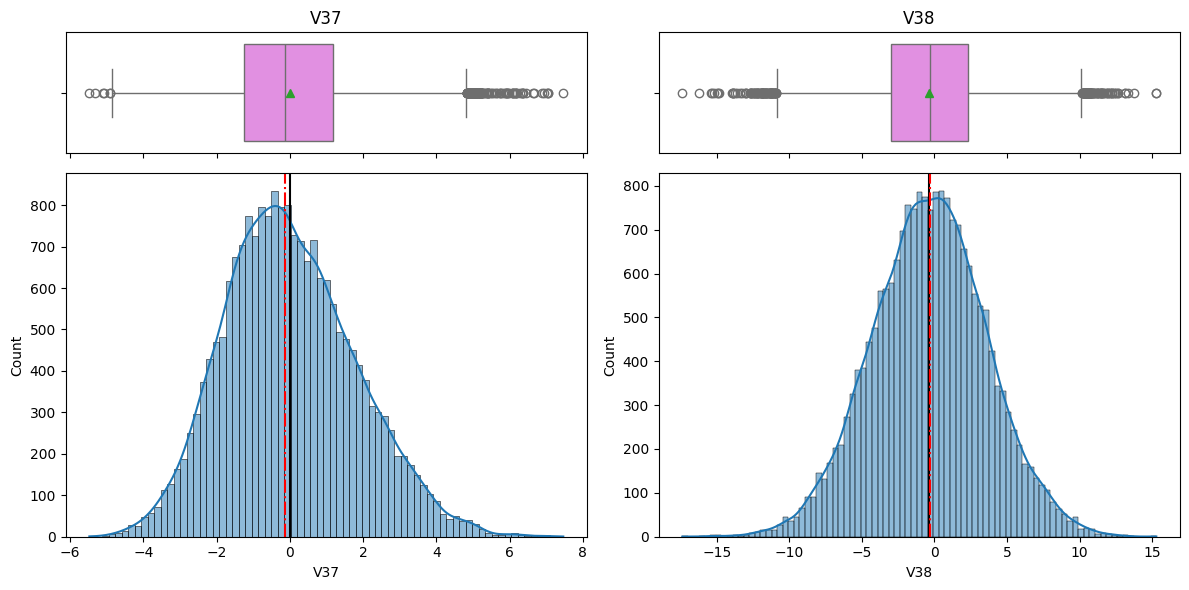

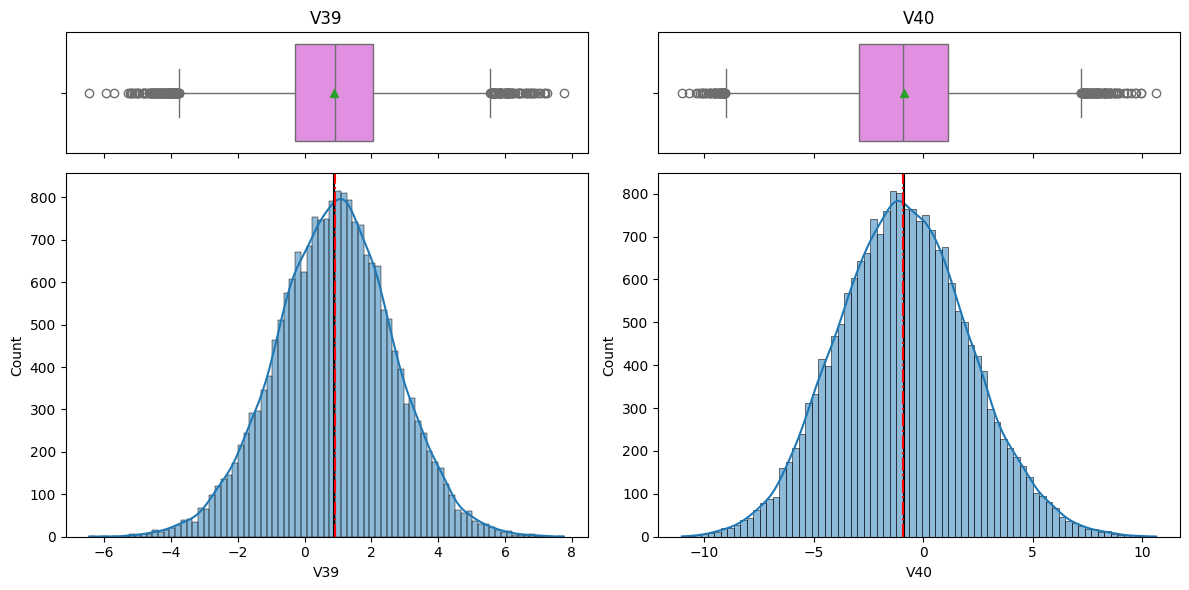

In [28]:
features = data.columns.tolist()
# Exclude the 'Target' as it is categorical
if 'Target' in features:
    features.remove('Target')

# Iterate through features in steps of 2 to plot two variables at a time
for i in range(0, len(features), 2):
    # Get the current pair of features
    current_features = features[i:i+2]
    boxplot_histogram(data, current_features)

Observations:
* Many of the features have mean and median values that are almost same, with the plots showing normal distrubution
* There are a few features that have slightly left or right skewed distribution
* No features were observed having heavily skewed distribution
* All the features were noted to have outliers

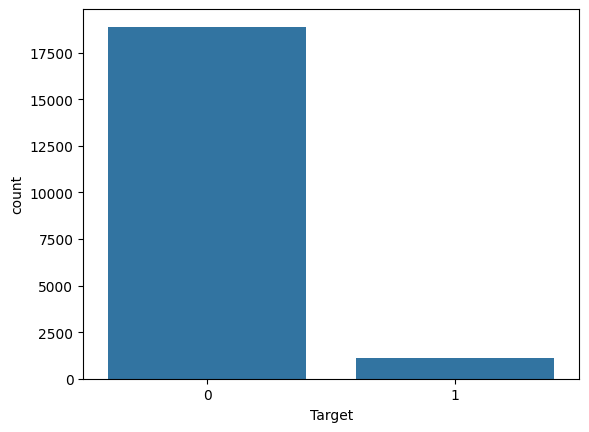

In [29]:
# Generate countplot for the Target variable
sns.countplot(data, x='Target');

In [30]:
# Check the count of occurrences for each target class
data.Target.value_counts()

Target
0    18890
1     1110
Name: count, dtype: int64

In [188]:
# Check the % distribution for each target class
data.Target.value_counts(True)

Target
0    0.9445
1    0.0555
Name: proportion, dtype: float64

Observations:
* Dataset is highly imbalanced with only 1110 records (about 5.55% of the records) having generator failure out of the 20000 records

## Bivariate Analysis

<Axes: >

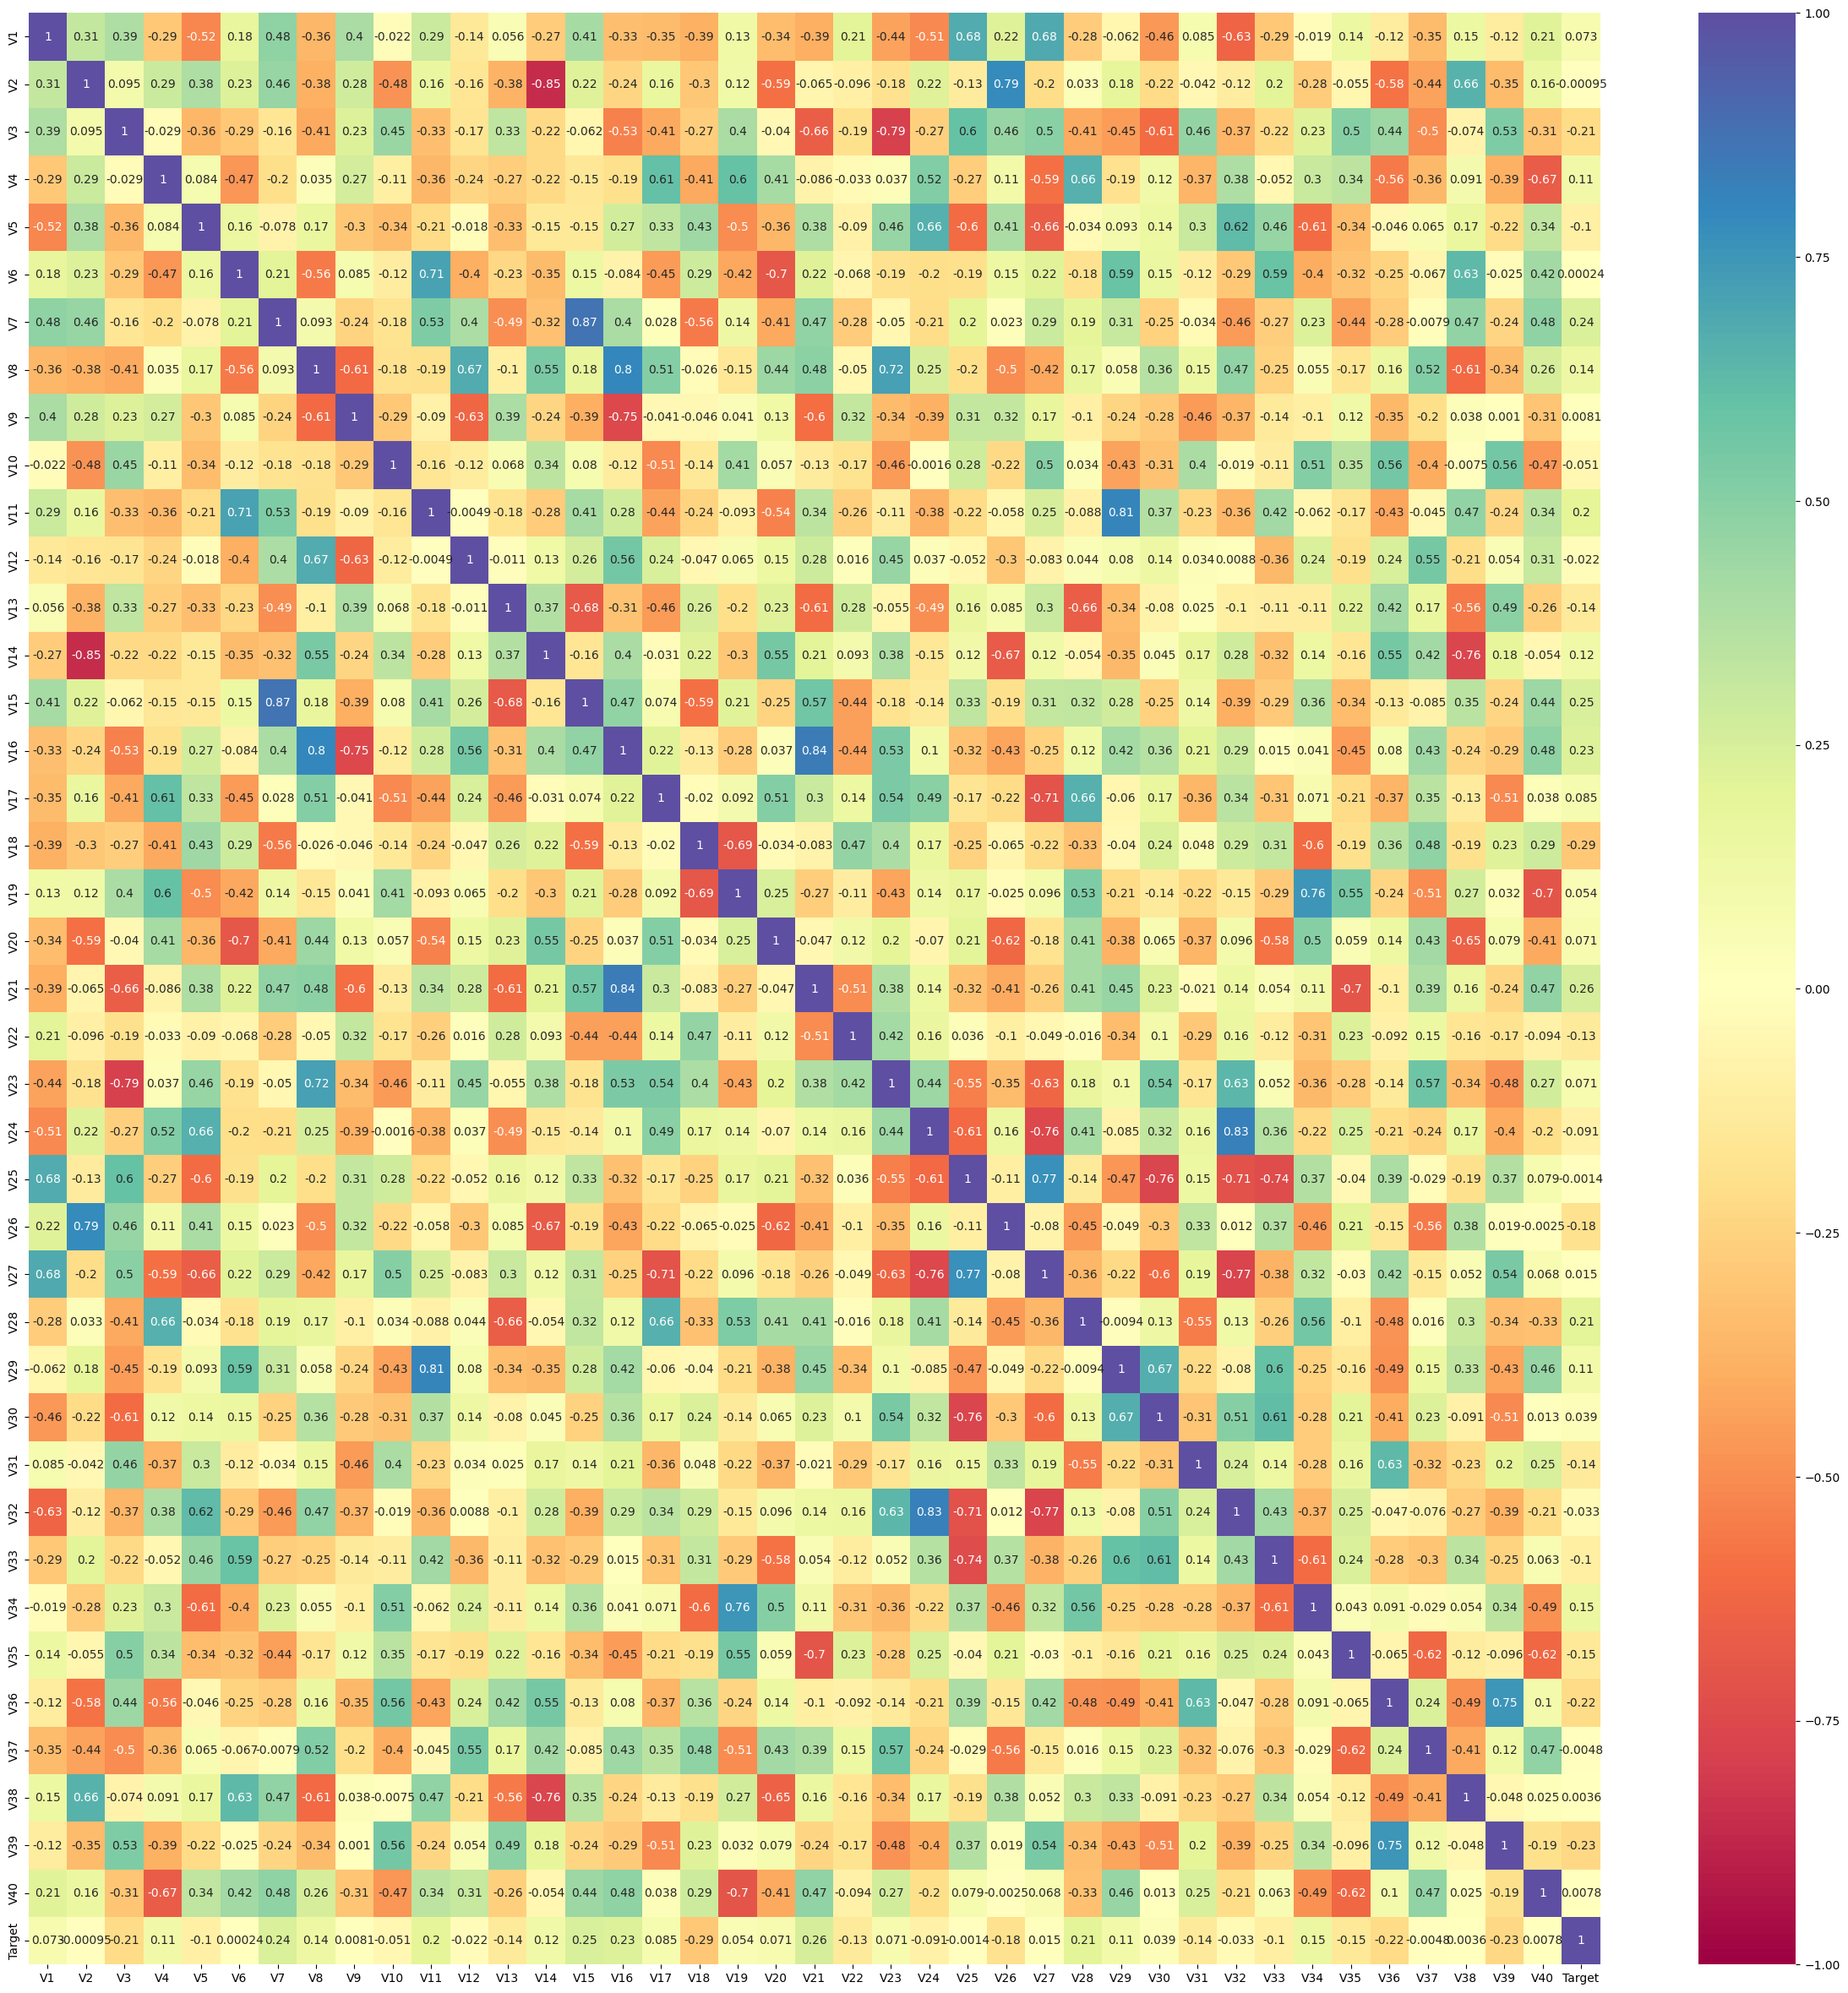

In [31]:
# Generate a heatmap for the correlation for all the features in the dataset
plt.figure(figsize=(30,30))
sns.heatmap(data.corr(), annot=True, cmap='Spectral', fmt='.2g',vmin=-1,vmax=1)

Observations:
* Quite a few variables have strong correlation, with the values going up to 0.87 and -0.85
* High correlation has been observed between many features in both positive and negative directions
* Dataset appears to have many features that are correlated

# **Data Preprocessing**

In [33]:
# Split the dataset vertically into predictors and target variable
x = data.drop('Target', axis=1)
y = data['Target']

# Split the records in the dataset into training and validation datasets. Use 15% of the data for validation
# Since a separate test dataset has been provided, we will split the data into only train and validation datasets
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.15, random_state=1, stratify=y)

In [34]:
print('Size of train dataset:', x_train.shape)
print('Size of validation dataset:', x_val.shape)
print()
print('Percentage of classes in train dataset:')
print(y_train.value_counts(True))
print()
print('Percentage of classes in validation dataset:')
print(y_val.value_counts(True))

Size of train dataset: (17000, 40)
Size of validation dataset: (3000, 40)

Percentage of classes in train dataset:
Target
0    0.944529
1    0.055471
Name: proportion, dtype: float64

Percentage of classes in validation dataset:
Target
0    0.944333
1    0.055667
Name: proportion, dtype: float64


Missing values were observed in V1 and V2 columns in the dataset. Let's check and impute the missing values

In [35]:
# Check for missing values in the training dataset
x_train[['V1', 'V2']].isna().sum()

V1    16
V2    16
dtype: int64

In [36]:
# Check for missing values in the validation dataset
x_val[['V1', 'V2']].isna().sum()

V1    2
V2    2
dtype: int64

- As noted above, columns V1 and V2 have missing values in both training and validation datasets.
- Let's use 'median' of these columns to impute the missing values as outliers can have impact if mean is used
- Imputation will be performed separately on training and test datasets to avoid data leakage

In [37]:
# Impute the missing values in the training dataset
imputer = SimpleImputer(strategy='median')
x_train[['V1', 'V2']] = imputer.fit_transform(x_train[['V1', 'V2']])

In [38]:
# Using the imputer used on training dataset, impute the missing values in the validation dataset
x_val[['V1', 'V2']] = imputer.transform(x_val[['V1', 'V2']])

In [39]:
# After imputation, verify the missing values again
print('Training data:\n' + str(x_train[['V1', 'V2']].isna().sum()))
print('\nValidation data:\n' + str(x_val[['V1', 'V2']].isna().sum()))

Training data:
V1    0
V2    0
dtype: int64

Validation data:
V1    0
V2    0
dtype: int64


#### Scaling data

* Let's perform scaling of the data in the predictor columns for faster convergence and effective learning

In [40]:
# Get the features in the dataset, except fo the target column
features = data.columns.tolist()
if 'Target' in features:
    features.remove('Target')

# Using StandardScaler, perform scaling on the training dataset
# Scaler created below will be used to scale the data in both validation and test datasets
scaler = StandardScaler()
x_train[features] = scaler.fit_transform(x_train[features])

# Using the scaler created above, perform scaling on the validation dataset
x_val[features] = scaler.transform(x_val[features])

# **Model Building**

## Model Evaluation Criterion

Write down the model evaluation criterion with rationale

**A model can make wrong predictions in the following ways:**
- Predicting the generator will fail, but in reality the generator will did not fail(False Positive: Predicted - 1, Actual - 0)
- Predicting the generator will not fail, but in reality the generator will fail (False Negative: Predicted - 0, Actual - 1)

**What is important to ReneWind?**
* ReneWind wants to reduce the overall maintenance costs
* If we predict that the generator will fail, but in reality if it will not fail, below things could happen
  * ReneWind will have to pay for inspection cost to inspect the generator for possible failure
  * It will lead to waste of money and resources if no issues are detected
* If we predict that the generator will not fail, but in reality if it will fail, below things could happen:
  * ReneWind will have to pay for replacement of parts or the complete generator
  * It will lead to paying more than paying for repairs
  * It will also impact the production until replacement is completed

**How to identify as many failures as possible**
* The cost estimates for replacement of generator, repair of generator, and inspection of generator are not provided
* Assuming that the cost of replacement is very high compared to the other costs, ReneWind would want to identify as many failures as possible
* To identify as many failures as possible, we need the model to reduce the False Negatives
* This may lead to more False Positives, but as inpection costs are less than replacement and repair costs, it will lead to overall cost savings
* To achieve this goal, we will maximize the Recall score for the model

In [41]:
# Fixing the seed for random number generators
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [42]:
# Define a function to draw plots for the metrics being tracked for model building
def plot_performance(history, metric):
    figure, axis = plt.subplots()
    plt.plot(history.history[metric])
    plt.plot(history.history['val_'+ metric])

    plt.title('Model ' + metric)
    plt.ylabel(metric.capitalize())

    figure.legend(['Train', 'Validation'], loc='upper right')

In [43]:
# Define function to compute different metrics to check the performance of a model


def model_performance_classification_sklearn(model, features, target):
    # predicting using the independent variables
    pred_prob = model.predict(features)
    # Convert probabilities to binary predictions. Probabilty > 0.5 will be treated as outcome = 1
    pred = (pred_prob > 0.5).astype(int)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [184]:
# Define function to plot the confusion matrix

def confusion_matrix_sklearn(target, predicted):
    predicted = predicted > 0.5
    cm = confusion_matrix(target, predicted)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

In [44]:
# Use binary_crossentropy as the loss function for neural network models
loss = "binary_crossentropy"

In [45]:
# Use Recall as the metric to evaluate the models
metric=['Recall']

In [46]:
# As the dataset is highly imbalanced, compute the class weight to be used while build the models
class_weights = class_weight.compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weights = dict(enumerate(class_weights))
class_weights

{0: np.float64(0.529364140250358), 1: np.float64(9.013785790031813)}

In [47]:
# Define dataframes to track the model performance on training and validation datasets
model_train_perf = pd.DataFrame()
model_val_perf = pd.DataFrame()

In [48]:
# Create a DataFrame to track the performances of the models for given model parameters
columns = ['Hidden Layers', 'Neurons', 'Activation', 'Epochs', 'Batch Size', 'Dropout', 'BatchNormalization', 'Weight Initialization', 'Optimizer', 'Learning Rate', 'Class Weight', 'Time(secs)', 'Train_Loss', 'Val_Loss', 'Train_Recall', 'Val_Recall']
results = pd.DataFrame(columns=columns)

## Initial Model Building (Model 0)

- Let's start with a neural network consisting of
  - just one hidden layer
  - activation function of ReLU
  - SGD as the optimizer

Let's build a simple model with:
- One hidden layer
- ReLU as activation function
- SGD as optimizer
- Batch size as complete training dataset size
- 1 epoch


In [49]:
# Clear the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [50]:
# Define a model using one hidden layer with 8 neurons
model0 = Sequential()
model0.add(Dense(8, activation='relu', input_dim=x_train.shape[1]))
model0.add(Dense(1, activation='sigmoid'))
model0.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 8)              │           328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 337 (1.32 KB)

 Trainable params: 337 (1.32 KB)

 Non-trainable params: 0 (0.00 B)

In [51]:
# Compile the model using SGD optimizer
model0.compile(loss=loss, optimizer=SGD(), metrics=metric)

In [52]:
# Train the model
startTime = time.time()
history = model0.fit(x_train, y_train, validation_data=(x_val, y_val), verbose=2)
endTime = time.time()

532/532 - 4s - 8ms/step - Recall: 0.2238 - loss: 0.3569 - val_Recall: 0.0000e+00 - val_loss: 0.2349


In [53]:
# Save the model parameters and performance metrics in the dataframe
results.loc[0] = [1, '8', 'relu', 1, '17000', '-', '-', '-', 'SGD', '-', '-', endTime-startTime, history.history['loss'][-1], history.history['val_loss'][-1], history.history['Recall'][-1], history.history['val_Recall'][-1]]
results

Hidden Layers Neurons Activation  Epochs Batch Size Dropout  \
0              1       8       relu       1      17000       -   

  BatchNormalization Weight Initialization Optimizer Learning Rate  \
0                  -                     -       SGD             -   

  Class Weight  Time(secs)  Train_Loss  Val_Loss  Train_Recall  Val_Recall  
0            -    4.232467    0.356876  0.234895      0.223754         0.0

In [54]:
# Evaluate Accuracy, Recall, Precision and F1 scores for the model using training and validation datasets
model_performance = model_performance_classification_sklearn(model0, x_train, y_train)
model_performance.index = [0]
model_train_perf = pd.concat([model_train_perf, model_performance])

model_performance = model_performance_classification_sklearn(model0, x_val, y_val)
model_performance.index = [0]
model_val_perf = pd.concat([model_val_perf, model_performance])

532/532 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


* Recall score for training and validation datasets are too low
* Model is too simple and performance is very bad

# **Model Performance Improvement**

## Model 1

While using the parameters used in the previous model, let's add below parameters while training the model
* Batch size of 50
* Epochs as 10

In [55]:
# Clear the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [56]:
# Define a model using one hidden layer with 8 neurons
model1 = Sequential()
model1.add(Dense(8, activation='relu', input_dim=x_train.shape[1]))
model1.add(Dense(1, activation='sigmoid'))
model1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 8)              │           328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 337 (1.32 KB)

 Trainable params: 337 (1.32 KB)

 Non-trainable params: 0 (0.00 B)

In [57]:
# Compile the model using SGD optimizer
model1.compile(loss=loss, optimizer=SGD(), metrics=metric)

In [58]:
# Train the model using a batch size of 50 and epochs as 10
startTime = time.time()
history = model1.fit(x_train, y_train, batch_size=50, epochs=10, validation_data=(x_val, y_val), verbose=2)
endTime = time.time()

Epoch 1/10
340/340 - 2s - 7ms/step - Recall: 0.2492 - loss: 0.4936 - val_Recall: 0.0000e+00 - val_loss: 0.2606
Epoch 2/10
340/340 - 1s - 3ms/step - Recall: 0.0127 - loss: 0.2228 - val_Recall: 0.0120 - val_loss: 0.1970
Epoch 3/10
340/340 - 1s - 2ms/step - Recall: 0.0551 - loss: 0.1822 - val_Recall: 0.0778 - val_loss: 0.1654
Epoch 4/10
340/340 - 2s - 5ms/step - Recall: 0.1559 - loss: 0.1600 - val_Recall: 0.2275 - val_loss: 0.1458
Epoch 5/10
340/340 - 3s - 7ms/step - Recall: 0.2503 - loss: 0.1454 - val_Recall: 0.3413 - val_loss: 0.1332
Epoch 6/10
340/340 - 1s - 2ms/step - Recall: 0.3298 - loss: 0.1349 - val_Recall: 0.4012 - val_loss: 0.1244
Epoch 7/10
340/340 - 1s - 2ms/step - Recall: 0.3934 - loss: 0.1269 - val_Recall: 0.4491 - val_loss: 0.1179
Epoch 8/10
340/340 - 1s - 2ms/step - Recall: 0.4295 - loss: 0.1205 - val_Recall: 0.4910 - val_loss: 0.1126
Epoch 9/10
340/340 - 1s - 2ms/step - Recall: 0.4592 - loss: 0.1152 - val_Recall: 0.5210 - val_loss: 0.1083
Epoch 10/10
340/340 - 1s - 2ms/st

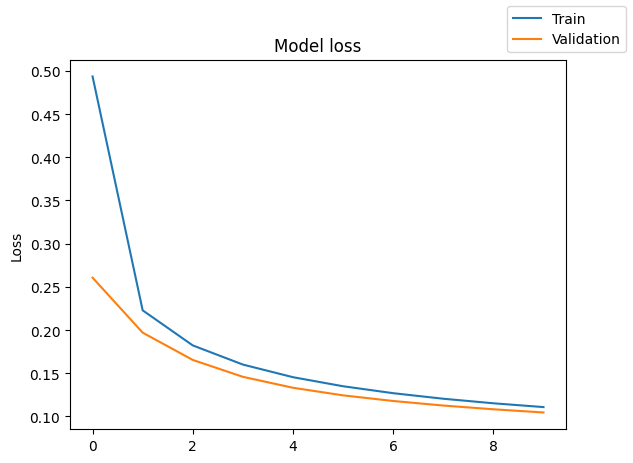

In [59]:
# Draw the plots to observe the change in loss on training and validation datasets while model is being trained
plot_performance(history, 'loss')

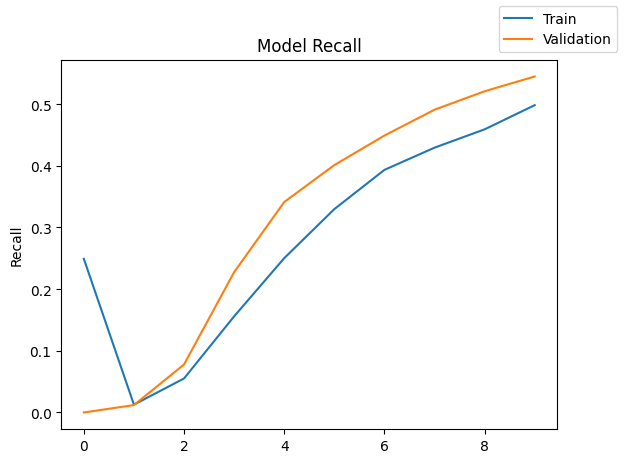

In [60]:
# Draw the plots to observe the change in Recall score on training and validation datasets while model is being trained
plot_performance(history, 'Recall')

In [61]:
# Save the model parameters and performance metrics in the dataframe
results.loc[1] = [1, '8', 'relu', 10, 50, '-', '-', '-', 'SGD', '-', '-', endTime-startTime, history.history['loss'][-1], history.history['val_loss'][-1], history.history['Recall'][-1], history.history['val_Recall'][-1]]
results

Hidden Layers Neurons Activation  Epochs Batch Size Dropout  \
0              1       8       relu       1      17000       -   
1              1       8       relu      10         50       -   

  BatchNormalization Weight Initialization Optimizer Learning Rate  \
0                  -                     -       SGD             -   
1                  -                     -       SGD             -   

  Class Weight  Time(secs)  Train_Loss  Val_Loss  Train_Recall  Val_Recall  
0            -    4.232467    0.356876  0.234895      0.223754     0.00000  
1            -   12.431931    0.110806  0.104561      0.498409     0.54491

In [62]:
# Evaluate Accuracy, Recall, Precision and F1 scores for the model using training and validation datasets
model_performance = model_performance_classification_sklearn(model1, x_train, y_train)
model_performance.index = [1]
model_train_perf = pd.concat([model_train_perf, model_performance])

model_performance = model_performance_classification_sklearn(model1, x_val, y_val)
model_performance.index = [1]
model_val_perf = pd.concat([model_val_perf, model_performance])

532/532 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


* There is an improvement in the training and validation recall scores
* But the scores are still low, and model can be improved further

## Model 2

* Let's increase the number of epochs to see if the performance improves

In [63]:
# Clear the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [64]:
# Define a model using one hidden layer with 8 neurons
model2 = Sequential()
model2.add(Dense(8, activation='relu', input_dim=x_train.shape[1]))
model2.add(Dense(1, activation='sigmoid'))
model2.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 8)              │           328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 337 (1.32 KB)

 Trainable params: 337 (1.32 KB)

 Non-trainable params: 0 (0.00 B)

In [65]:
# Compile the model using SGD optimizer
model2.compile(loss=loss, optimizer=SGD(), metrics=metric)

In [66]:
# Train the model using a batch size of 50 and epochs as 25
startTime = time.time()
history = model2.fit(x_train, y_train, batch_size=50, epochs=25, validation_data=(x_val, y_val), verbose=2)
endTime = time.time()

Epoch 1/25
340/340 - 2s - 6ms/step - Recall: 0.0976 - loss: 0.4716 - val_Recall: 0.0838 - val_loss: 0.2568
Epoch 2/25
340/340 - 1s - 2ms/step - Recall: 0.1538 - loss: 0.2144 - val_Recall: 0.2335 - val_loss: 0.1826
Epoch 3/25
340/340 - 1s - 2ms/step - Recall: 0.2545 - loss: 0.1644 - val_Recall: 0.2994 - val_loss: 0.1503
Epoch 4/25
340/340 - 1s - 3ms/step - Recall: 0.3478 - loss: 0.1418 - val_Recall: 0.3293 - val_loss: 0.1345
Epoch 5/25
340/340 - 1s - 3ms/step - Recall: 0.3849 - loss: 0.1301 - val_Recall: 0.4012 - val_loss: 0.1252
Epoch 6/25
340/340 - 1s - 2ms/step - Recall: 0.4051 - loss: 0.1227 - val_Recall: 0.4491 - val_loss: 0.1186
Epoch 7/25
340/340 - 1s - 2ms/step - Recall: 0.4358 - loss: 0.1174 - val_Recall: 0.4790 - val_loss: 0.1136
Epoch 8/25
340/340 - 1s - 2ms/step - Recall: 0.4634 - loss: 0.1131 - val_Recall: 0.5090 - val_loss: 0.1094
Epoch 9/25
340/340 - 1s - 2ms/step - Recall: 0.4783 - loss: 0.1095 - val_Recall: 0.5269 - val_loss: 0.1059
Epoch 10/25
340/340 - 1s - 2ms/step -

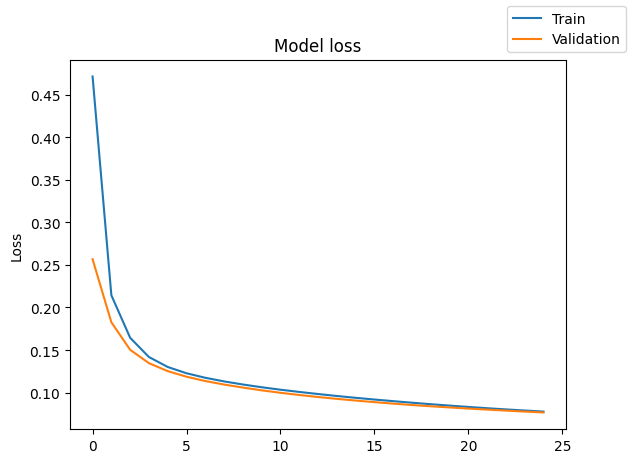

In [67]:
# Draw the plots to observe the change in loss on training and validation datasets while model is being trained
plot_performance(history, 'loss')

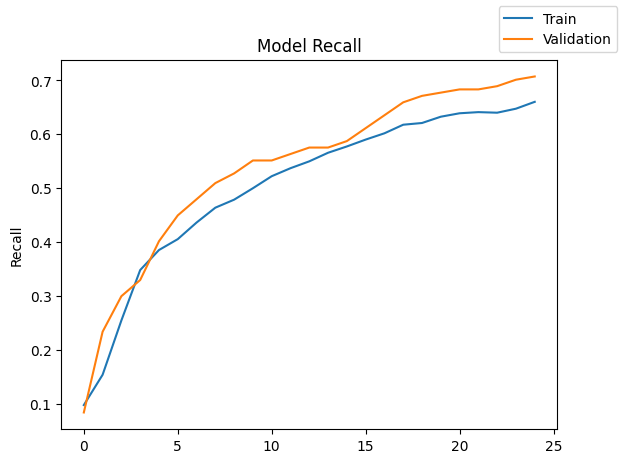

In [68]:
# Draw the plots to observe the change in Recall score on training and validation datasets while model is being trained
plot_performance(history, 'Recall')

In [69]:
# Save the model parameters and performance metrics in the dataframe
results.loc[2] = [1, '8', 'relu', 25, 50, '-', '-', '-', 'SGD', '-', '-', endTime-startTime, history.history['loss'][-1], history.history['val_loss'][-1], history.history['Recall'][-1], history.history['val_Recall'][-1]]
results

Hidden Layers Neurons Activation  Epochs Batch Size Dropout  \
0              1       8       relu       1      17000       -   
1              1       8       relu      10         50       -   
2              1       8       relu      25         50       -   

  BatchNormalization Weight Initialization Optimizer Learning Rate  \
0                  -                     -       SGD             -   
1                  -                     -       SGD             -   
2                  -                     -       SGD             -   

  Class Weight  Time(secs)  Train_Loss  Val_Loss  Train_Recall  Val_Recall  
0            -    4.232467    0.356876  0.234895      0.223754    0.000000  
1            -   12.431931    0.110806  0.104561      0.498409    0.544910  
2            -   22.581395    0.077632  0.076584      0.659597    0.706587

In [70]:
# Evaluate Accuracy, Recall, Precision and F1 scores for the model using training and validation datasets
model_performance = model_performance_classification_sklearn(model2, x_train, y_train)
model_performance.index = [2]
model_train_perf = pd.concat([model_train_perf, model_performance])

model_performance = model_performance_classification_sklearn(model2, x_val, y_val)
model_performance.index = [2]
model_val_perf = pd.concat([model_val_perf, model_performance])

532/532 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


* There is further improvement in training and validation recall scores
* But the model is still learning slowly and can be further improved

## Model 3

* Let's change the optimizer to Adam
* We will not change any other parameters

In [71]:
# Clear the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [72]:
# Define a model using one hidden layer with 8 neurons
model3 = Sequential()
model3.add(Dense(8, activation='relu', input_dim=x_train.shape[1]))
model3.add(Dense(1, activation='sigmoid'))
model3.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 8)              │           328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 337 (1.32 KB)

 Trainable params: 337 (1.32 KB)

 Non-trainable params: 0 (0.00 B)

In [73]:
# Compile the model using Adam optimizer
model3.compile(loss=loss, optimizer=Adam(), metrics=metric)

In [74]:
# Train the model using a batch size of 50 and epochs as 25
startTime = time.time()
history = model3.fit(x_train, y_train, batch_size=50, epochs=25, validation_data=(x_val, y_val), verbose=2)
endTime = time.time()

Epoch 1/25
340/340 - 2s - 7ms/step - Recall: 0.4560 - loss: 0.5521 - val_Recall: 0.2695 - val_loss: 0.2278
Epoch 2/25
340/340 - 1s - 3ms/step - Recall: 0.3712 - loss: 0.1801 - val_Recall: 0.4491 - val_loss: 0.1483
Epoch 3/25
340/340 - 1s - 4ms/step - Recall: 0.4825 - loss: 0.1386 - val_Recall: 0.5389 - val_loss: 0.1246
Epoch 4/25
340/340 - 2s - 6ms/step - Recall: 0.5355 - loss: 0.1209 - val_Recall: 0.6287 - val_loss: 0.1104
Epoch 5/25
340/340 - 1s - 2ms/step - Recall: 0.5811 - loss: 0.1083 - val_Recall: 0.6587 - val_loss: 0.0993
Epoch 6/25
340/340 - 1s - 2ms/step - Recall: 0.6119 - loss: 0.0982 - val_Recall: 0.6886 - val_loss: 0.0909
Epoch 7/25
340/340 - 1s - 2ms/step - Recall: 0.6384 - loss: 0.0902 - val_Recall: 0.7365 - val_loss: 0.0846
Epoch 8/25
340/340 - 1s - 2ms/step - Recall: 0.6681 - loss: 0.0839 - val_Recall: 0.7545 - val_loss: 0.0799
Epoch 9/25
340/340 - 1s - 2ms/step - Recall: 0.6967 - loss: 0.0787 - val_Recall: 0.7605 - val_loss: 0.0764
Epoch 10/25
340/340 - 1s - 2ms/step -

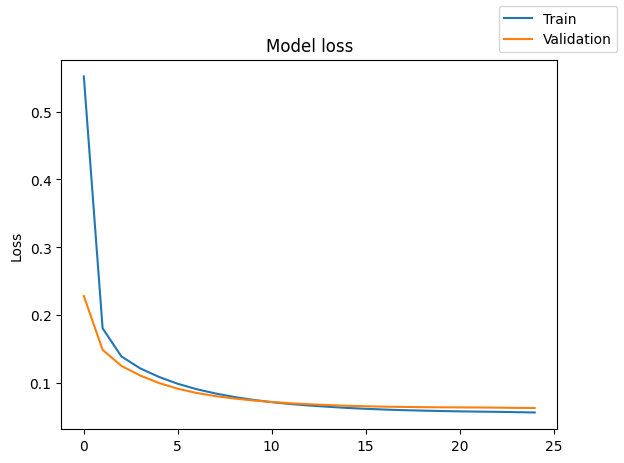

In [75]:
# Draw the plots to observe the change in loss on training and validation datasets while model is being trained
plot_performance(history, 'loss')

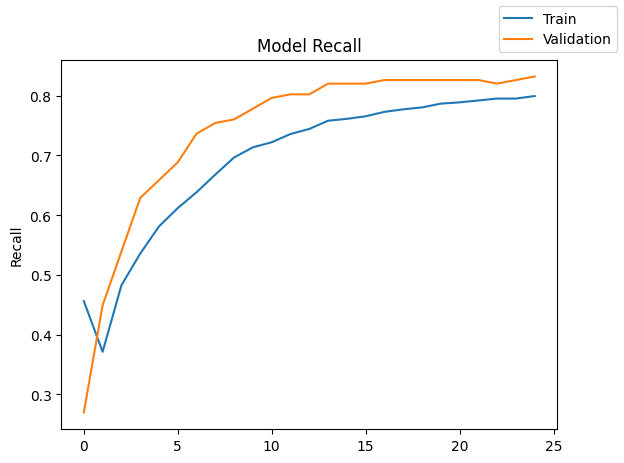

In [76]:
# Draw the plots to observe the change in Recall score on training and validation datasets while model is being trained
plot_performance(history, 'Recall')

In [77]:
# Save the model parameters and performance metrics in the dataframe
results.loc[3] = [1, '8', 'relu', 25, 50, '-', '-', '-', 'Adam', '-', '-', endTime-startTime, history.history['loss'][-1], history.history['val_loss'][-1], history.history['Recall'][-1], history.history['val_Recall'][-1]]
results

Hidden Layers Neurons Activation  Epochs Batch Size Dropout  \
0              1       8       relu       1      17000       -   
1              1       8       relu      10         50       -   
2              1       8       relu      25         50       -   
3              1       8       relu      25         50       -   

  BatchNormalization Weight Initialization Optimizer Learning Rate  \
0                  -                     -       SGD             -   
1                  -                     -       SGD             -   
2                  -                     -       SGD             -   
3                  -                     -      Adam             -   

  Class Weight  Time(secs)  Train_Loss  Val_Loss  Train_Recall  Val_Recall  
0            -    4.232467    0.356876  0.234895      0.223754    0.000000  
1            -   12.431931    0.110806  0.104561      0.498409    0.544910  
2            -   22.581395    0.077632  0.076584      0.659597    0.706587  
3            -   24.618023    0.055756  0.062324      0.799576    0.832335

In [78]:
# Evaluate Accuracy, Recall, Precision and F1 scores for the model using training and validation datasets
model_performance = model_performance_classification_sklearn(model3, x_train, y_train)
model_performance.index = [3]
model_train_perf = pd.concat([model_train_perf, model_performance])

model_performance = model_performance_classification_sklearn(model3, x_val, y_val)
model_performance.index = [3]
model_val_perf = pd.concat([model_val_perf, model_performance])

532/532 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


* Performance has improved a lot using Adam as the optimizer
* Difference in the Recall score on training and validation dataset has also started to decrease, implying model has started to generalize
* Let's try to improve the performance by continuing to use Adam as the optimizer

## Model 4

* Let's increase the number of neurons in the hidden layer to see if performance improves further
* We will reuse the other parameters that were used in the previous model

In [79]:
# Clear the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [80]:
# Define a model using one hidden layer with 64 neurons
model4 = Sequential()
model4.add(Dense(64, activation='relu', input_dim=x_train.shape[1]))
model4.add(Dense(1, activation='sigmoid'))
model4.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         2,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,689 (10.50 KB)

 Trainable params: 2,689 (10.50 KB)

 Non-trainable params: 0 (0.00 B)

In [81]:
# Compile the model using Adam optimizer
model4.compile(loss=loss, optimizer=Adam(), metrics=metric)

In [82]:
# Train the model using a batch size of 50 and epochs as 25
startTime = time.time()
history = model4.fit(x_train, y_train, batch_size=50, epochs=25, validation_data=(x_val, y_val), verbose=2)
endTime = time.time()

Epoch 1/25
340/340 - 3s - 9ms/step - Recall: 0.3383 - loss: 0.1682 - val_Recall: 0.6048 - val_loss: 0.1009
Epoch 2/25
340/340 - 1s - 2ms/step - Recall: 0.6331 - loss: 0.0916 - val_Recall: 0.7365 - val_loss: 0.0772
Epoch 3/25
340/340 - 1s - 2ms/step - Recall: 0.7243 - loss: 0.0735 - val_Recall: 0.7844 - val_loss: 0.0670
Epoch 4/25
340/340 - 1s - 2ms/step - Recall: 0.7805 - loss: 0.0640 - val_Recall: 0.8024 - val_loss: 0.0624
Epoch 5/25
340/340 - 1s - 2ms/step - Recall: 0.8038 - loss: 0.0586 - val_Recall: 0.8204 - val_loss: 0.0602
Epoch 6/25
340/340 - 1s - 2ms/step - Recall: 0.8187 - loss: 0.0553 - val_Recall: 0.8204 - val_loss: 0.0589
Epoch 7/25
340/340 - 1s - 2ms/step - Recall: 0.8240 - loss: 0.0529 - val_Recall: 0.8323 - val_loss: 0.0581
Epoch 8/25
340/340 - 1s - 3ms/step - Recall: 0.8282 - loss: 0.0511 - val_Recall: 0.8383 - val_loss: 0.0575
Epoch 9/25
340/340 - 1s - 2ms/step - Recall: 0.8346 - loss: 0.0496 - val_Recall: 0.8263 - val_loss: 0.0571
Epoch 10/25
340/340 - 1s - 2ms/step -

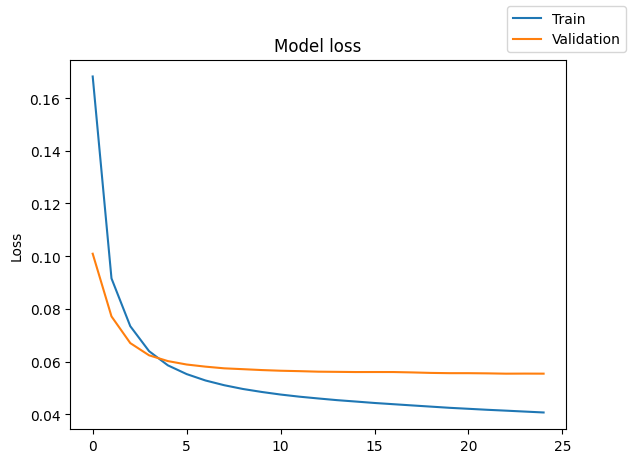

In [83]:
# Draw the plots to observe the change in loss on training and validation datasets while model is being trained
plot_performance(history, 'loss')

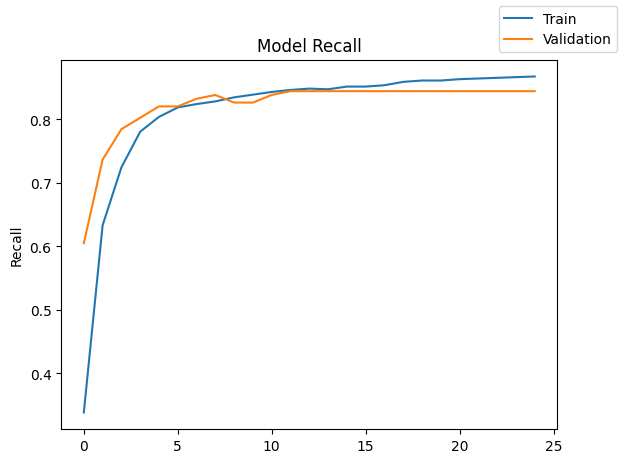

In [84]:
# Draw the plots to observe the change in Recall score on training and validation datasets while model is being trained
plot_performance(history, 'Recall')

In [85]:
# Save the model parameters and performance metrics in the dataframe
results.loc[4] = [1, '64', 'relu', 25, 50, '-', '-', '-', 'Adam', '-', '-', endTime-startTime, history.history['loss'][-1], history.history['val_loss'][-1], history.history['Recall'][-1], history.history['val_Recall'][-1]]
results

Hidden Layers Neurons Activation  Epochs Batch Size Dropout  \
0              1       8       relu       1      17000       -   
1              1       8       relu      10         50       -   
2              1       8       relu      25         50       -   
3              1       8       relu      25         50       -   
4              1      64       relu      25         50       -   

  BatchNormalization Weight Initialization Optimizer Learning Rate  \
0                  -                     -       SGD             -   
1                  -                     -       SGD             -   
2                  -                     -       SGD             -   
3                  -                     -      Adam             -   
4                  -                     -      Adam             -   

  Class Weight  Time(secs)  Train_Loss  Val_Loss  Train_Recall  Val_Recall  
0            -    4.232467    0.356876  0.234895      0.223754    0.000000  
1            -   12.431931    0.110806  0.104561      0.498409    0.544910  
2            -   22.581395    0.077632  0.076584      0.659597    0.706587  
3            -   24.618023    0.055756  0.062324      0.799576    0.832335  
4            -   23.753295    0.040713  0.055440      0.867444    0.844311

In [86]:
# Evaluate Accuracy, Recall, Precision and F1 scores for the model using training and validation datasets
model_performance = model_performance_classification_sklearn(model4, x_train, y_train)
model_performance.index = [4]
model_train_perf = pd.concat([model_train_perf, model_performance])

model_performance = model_performance_classification_sklearn(model4, x_val, y_val)
model_performance.index = [4]
model_val_perf = pd.concat([model_val_perf, model_performance])

532/532 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


* Adding more neurons to the hidden layer has further increased the Recall scores on the training and validation datasets
* Let's try to improve the performance further by adding one more hidden layer

## Model 5

* Let's add one more hidden layer to see if performance improves further
* We will reuse the other parameters that were used in the previous model

In [87]:
# Clear the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [88]:
# Define a model using two hidden layers with 64 neurons in the first layer and 8 neurons in the second layer
model5 = Sequential()
model5.add(Dense(64, activation='relu', input_dim=x_train.shape[1]))
model5.add(Dense(8, activation='relu'))
model5.add(Dense(1, activation='sigmoid'))
model5.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         2,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │           520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,153 (12.32 KB)

 Trainable params: 3,153 (12.32 KB)

 Non-trainable params: 0 (0.00 B)

In [89]:
# Compile the model using Adam optimizer
model5.compile(loss=loss, optimizer=Adam(), metrics=metric)

In [90]:
# Train the model using a batch size of 50 and epochs as 25
startTime = time.time()
history = model5.fit(x_train, y_train, batch_size=50, epochs=25, validation_data=(x_val, y_val), verbose=2)
endTime = time.time()

Epoch 1/25
340/340 - 3s - 8ms/step - Recall: 0.2577 - loss: 0.1518 - val_Recall: 0.6527 - val_loss: 0.0899
Epoch 2/25
340/340 - 1s - 2ms/step - Recall: 0.7179 - loss: 0.0773 - val_Recall: 0.7904 - val_loss: 0.0673
Epoch 3/25
340/340 - 1s - 4ms/step - Recall: 0.7985 - loss: 0.0611 - val_Recall: 0.8024 - val_loss: 0.0596
Epoch 4/25
340/340 - 1s - 3ms/step - Recall: 0.8250 - loss: 0.0528 - val_Recall: 0.8204 - val_loss: 0.0563
Epoch 5/25
340/340 - 1s - 3ms/step - Recall: 0.8441 - loss: 0.0480 - val_Recall: 0.8204 - val_loss: 0.0543
Epoch 6/25
340/340 - 1s - 2ms/step - Recall: 0.8590 - loss: 0.0447 - val_Recall: 0.8144 - val_loss: 0.0529
Epoch 7/25
340/340 - 1s - 3ms/step - Recall: 0.8664 - loss: 0.0423 - val_Recall: 0.8323 - val_loss: 0.0523
Epoch 8/25
340/340 - 1s - 4ms/step - Recall: 0.8717 - loss: 0.0406 - val_Recall: 0.8443 - val_loss: 0.0517
Epoch 9/25
340/340 - 1s - 3ms/step - Recall: 0.8749 - loss: 0.0392 - val_Recall: 0.8443 - val_loss: 0.0516
Epoch 10/25
340/340 - 1s - 2ms/step -

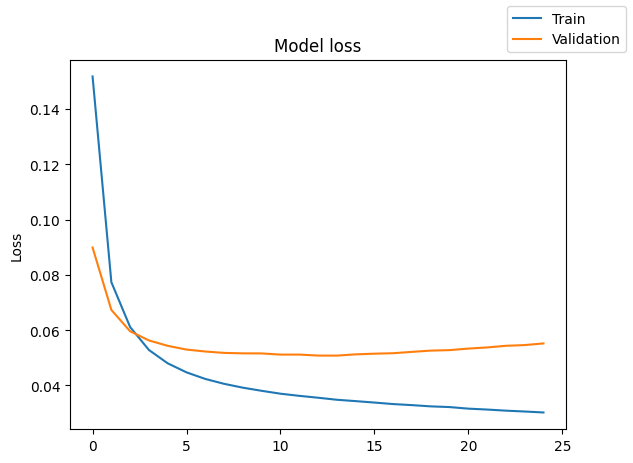

In [91]:
# Draw the plots to observe the change in loss on training and validation datasets while model is being trained
plot_performance(history, 'loss')

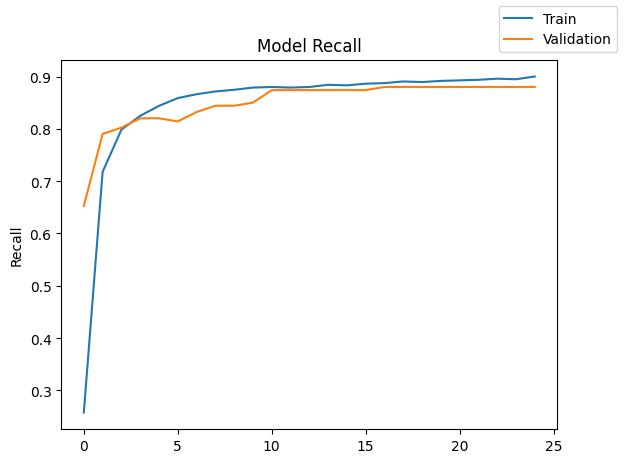

In [92]:
# Draw the plots to observe the change in Recall score on training and validation datasets while model is being trained
plot_performance(history, 'Recall')

In [93]:
# Save the model parameters and performance metrics in the dataframe
results.loc[5] = [2, [64, 8], ['relu', 'relu'], 25, 50, '-', '-', '-', 'Adam', '-', '-', endTime-startTime, history.history['loss'][-1], history.history['val_loss'][-1], history.history['Recall'][-1], history.history['val_Recall'][-1]]
results

Hidden Layers  Neurons    Activation  Epochs Batch Size Dropout  \
0              1        8          relu       1      17000       -   
1              1        8          relu      10         50       -   
2              1        8          relu      25         50       -   
3              1        8          relu      25         50       -   
4              1       64          relu      25         50       -   
5              2  [64, 8]  [relu, relu]      25         50       -   

  BatchNormalization Weight Initialization Optimizer Learning Rate  \
0                  -                     -       SGD             -   
1                  -                     -       SGD             -   
2                  -                     -       SGD             -   
3                  -                     -      Adam             -   
4                  -                     -      Adam             -   
5                  -                     -      Adam             -   

  Class Weight  Time(secs)  Train_Loss  Val_Loss  Train_Recall  Val_Recall  
0            -    4.232467    0.356876  0.234895      0.223754    0.000000  
1            -   12.431931    0.110806  0.104561      0.498409    0.544910  
2            -   22.581395    0.077632  0.076584      0.659597    0.706587  
3            -   24.618023    0.055756  0.062324      0.799576    0.832335  
4            -   23.753295    0.040713  0.055440      0.867444    0.844311  
5            -   25.468280    0.030187  0.055178      0.900318    0.880240

In [94]:
# Evaluate Accuracy, Recall, Precision and F1 scores for the model using training and validation datasets
model_performance = model_performance_classification_sklearn(model5, x_train, y_train)
model_performance.index = [5]
model_train_perf = pd.concat([model_train_perf, model_performance])

model_performance = model_performance_classification_sklearn(model5, x_val, y_val)
model_performance.index = [5]
model_val_perf = pd.concat([model_val_perf, model_performance])

532/532 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


* Recall score has improved on the training dataset and the validation dataset
* Let's try to improve the performance of this model further

## Model 6

* Let's use the class weights while training the model, and see if the performance improves further
* We will reuse the other parameters that were used in the previous model

In [95]:
# Clear the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [96]:
# Define a model using two hidden layers with 64 neurons in the first layer and 8 neurons in the second layer
model6 = Sequential()
model6.add(Dense(64, activation='relu', input_dim=x_train.shape[1]))
model6.add(Dense(8, activation='relu'))
model6.add(Dense(1, activation='sigmoid'))
model6.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         2,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │           520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,153 (12.32 KB)

 Trainable params: 3,153 (12.32 KB)

 Non-trainable params: 0 (0.00 B)

In [97]:
# Compile the model using Adam optimizer
model6.compile(loss=loss, optimizer=Adam(), metrics=metric)

In [98]:
# Train the model using a class weights, batch size of 50 and epochs as 25
startTime = time.time()
history = model6.fit(x_train, y_train, batch_size=50, epochs=25, class_weight=class_weights, validation_data=(x_val, y_val), verbose=2)
endTime = time.time()

Epoch 1/25
340/340 - 3s - 8ms/step - Recall: 0.8579 - loss: 0.3735 - val_Recall: 0.8862 - val_loss: 0.2364
Epoch 2/25
340/340 - 1s - 3ms/step - Recall: 0.9035 - loss: 0.2480 - val_Recall: 0.8922 - val_loss: 0.1729
Epoch 3/25
340/340 - 1s - 3ms/step - Recall: 0.9014 - loss: 0.2153 - val_Recall: 0.8922 - val_loss: 0.1484
Epoch 4/25
340/340 - 1s - 3ms/step - Recall: 0.9046 - loss: 0.1966 - val_Recall: 0.8922 - val_loss: 0.1354
Epoch 5/25
340/340 - 1s - 4ms/step - Recall: 0.9067 - loss: 0.1841 - val_Recall: 0.8922 - val_loss: 0.1255
Epoch 6/25
340/340 - 1s - 3ms/step - Recall: 0.9099 - loss: 0.1753 - val_Recall: 0.8982 - val_loss: 0.1208
Epoch 7/25
340/340 - 1s - 3ms/step - Recall: 0.9130 - loss: 0.1685 - val_Recall: 0.8982 - val_loss: 0.1154
Epoch 8/25
340/340 - 1s - 3ms/step - Recall: 0.9130 - loss: 0.1626 - val_Recall: 0.8982 - val_loss: 0.1122
Epoch 9/25
340/340 - 1s - 3ms/step - Recall: 0.9141 - loss: 0.1578 - val_Recall: 0.8982 - val_loss: 0.1089
Epoch 10/25
340/340 - 1s - 4ms/step -

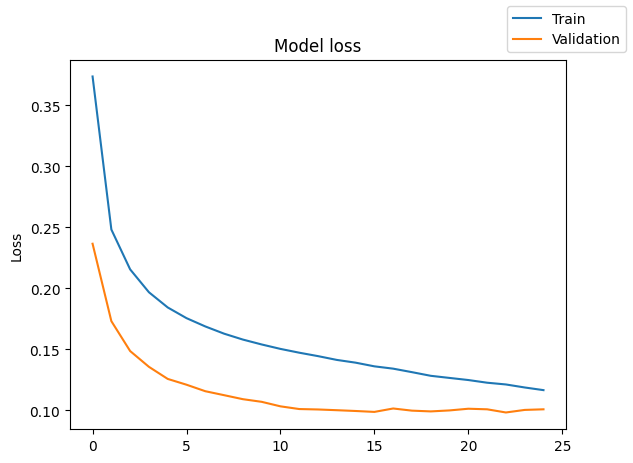

In [99]:
# Draw the plots to observe the change in loss on training and validation datasets while model is being trained
plot_performance(history, 'loss')

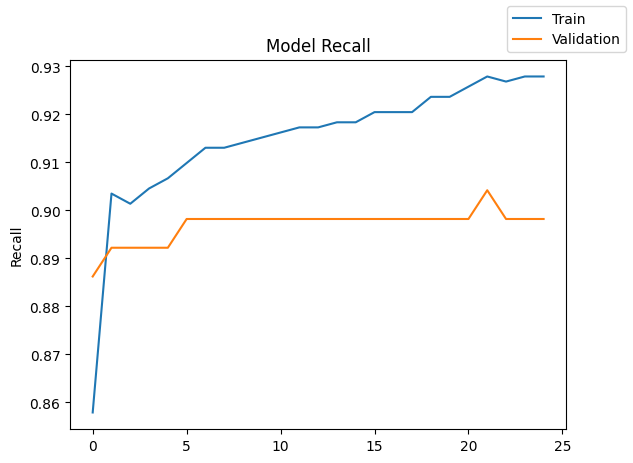

In [100]:
# Draw the plots to observe the change in Recall score on training and validation datasets while model is being trained
plot_performance(history, 'Recall')

In [101]:
# Save the model parameters and performance metrics in the dataframe
results.loc[6] = [2, [64, 8], ['relu', 'relu'], 25, 50, '-', '-', '-', 'Adam', '-', 'Balanced', endTime-startTime, history.history['loss'][-1], history.history['val_loss'][-1], history.history['Recall'][-1], history.history['val_Recall'][-1]]
results

Hidden Layers  Neurons    Activation  Epochs Batch Size Dropout  \
0              1        8          relu       1      17000       -   
1              1        8          relu      10         50       -   
2              1        8          relu      25         50       -   
3              1        8          relu      25         50       -   
4              1       64          relu      25         50       -   
5              2  [64, 8]  [relu, relu]      25         50       -   
6              2  [64, 8]  [relu, relu]      25         50       -   

  BatchNormalization Weight Initialization Optimizer Learning Rate  \
0                  -                     -       SGD             -   
1                  -                     -       SGD             -   
2                  -                     -       SGD             -   
3                  -                     -      Adam             -   
4                  -                     -      Adam             -   
5                  -                     -      Adam             -   
6                  -                     -      Adam             -   

  Class Weight  Time(secs)  Train_Loss  Val_Loss  Train_Recall  Val_Recall  
0            -    4.232467    0.356876  0.234895      0.223754    0.000000  
1            -   12.431931    0.110806  0.104561      0.498409    0.544910  
2            -   22.581395    0.077632  0.076584      0.659597    0.706587  
3            -   24.618023    0.055756  0.062324      0.799576    0.832335  
4            -   23.753295    0.040713  0.055440      0.867444    0.844311  
5            -   25.468280    0.030187  0.055178      0.900318    0.880240  
6     Balanced   25.644120    0.116325  0.100604      0.927890    0.898204

In [102]:
# Evaluate Accuracy, Recall, Precision and F1 scores for the model using training and validation datasets
model_performance = model_performance_classification_sklearn(model6, x_train, y_train)
model_performance.index = [6]
model_train_perf = pd.concat([model_train_perf, model_performance])

model_performance = model_performance_classification_sklearn(model6, x_val, y_val)
model_performance.index = [6]
model_val_perf = pd.concat([model_val_perf, model_performance])

532/532 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


* Recall scores on training dataset validation dataset have improved
* Difference in the recall score between training and validation dataset have increased, and appears to be slighly overfitting

## Model 7

* Let's add one more hidden layer to the model and notice the performance
* We will add a third hidden layer with 4 neurons
* We will reuse the other parameters that were used in the previous model

In [103]:
# Clear the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [104]:
# Define a model using two hidden layers with 64 neurons in the first layer, 8 neurons in the second layer and 4 neurons in the third layer
model7 = Sequential()
model7.add(Dense(64, activation='relu', input_dim=x_train.shape[1]))
model7.add(Dense(8, activation='relu'))
model7.add(Dense(4, activation='relu'))
model7.add(Dense(1, activation='sigmoid'))
model7.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         2,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │           520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,185 (12.44 KB)

 Trainable params: 3,185 (12.44 KB)

 Non-trainable params: 0 (0.00 B)

In [105]:
# Compile the model using Adam optimizer
model7.compile(loss=loss, optimizer=Adam(), metrics=metric)

In [106]:
# Train the model using a class weights, batch size of 50 and epochs as 25
startTime = time.time()
history = model7.fit(x_train, y_train, batch_size=50, epochs=25, class_weight=class_weights, validation_data=(x_val, y_val), verbose=2)
endTime = time.time()

Epoch 1/25
340/340 - 4s - 11ms/step - Recall: 0.8388 - loss: 0.3765 - val_Recall: 0.8802 - val_loss: 0.2202
Epoch 2/25
340/340 - 1s - 3ms/step - Recall: 0.8897 - loss: 0.2430 - val_Recall: 0.8862 - val_loss: 0.1741
Epoch 3/25
340/340 - 1s - 3ms/step - Recall: 0.8950 - loss: 0.2101 - val_Recall: 0.8922 - val_loss: 0.1518
Epoch 4/25
340/340 - 1s - 3ms/step - Recall: 0.9014 - loss: 0.1896 - val_Recall: 0.8862 - val_loss: 0.1383
Epoch 5/25
340/340 - 1s - 3ms/step - Recall: 0.9067 - loss: 0.1775 - val_Recall: 0.8862 - val_loss: 0.1303
Epoch 6/25
340/340 - 1s - 3ms/step - Recall: 0.9099 - loss: 0.1691 - val_Recall: 0.8862 - val_loss: 0.1245
Epoch 7/25
340/340 - 1s - 3ms/step - Recall: 0.9120 - loss: 0.1617 - val_Recall: 0.8862 - val_loss: 0.1233
Epoch 8/25
340/340 - 1s - 3ms/step - Recall: 0.9130 - loss: 0.1560 - val_Recall: 0.8862 - val_loss: 0.1161
Epoch 9/25
340/340 - 1s - 3ms/step - Recall: 0.9141 - loss: 0.1509 - val_Recall: 0.8862 - val_loss: 0.1107
Epoch 10/25
340/340 - 1s - 3ms/step 

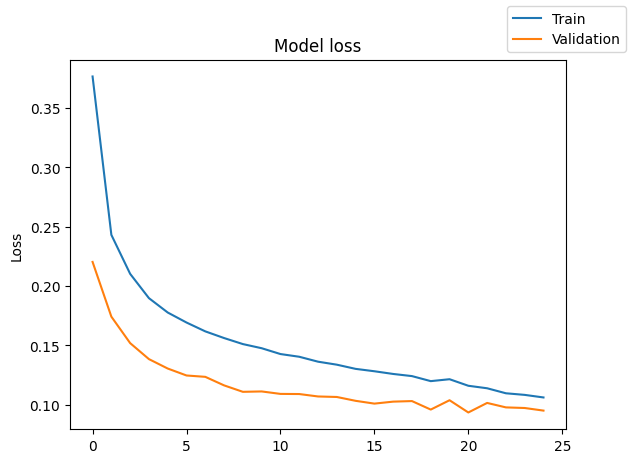

In [107]:
# Draw the plots to observe the change in loss on training and validation datasets while model is being trained
plot_performance(history, 'loss')

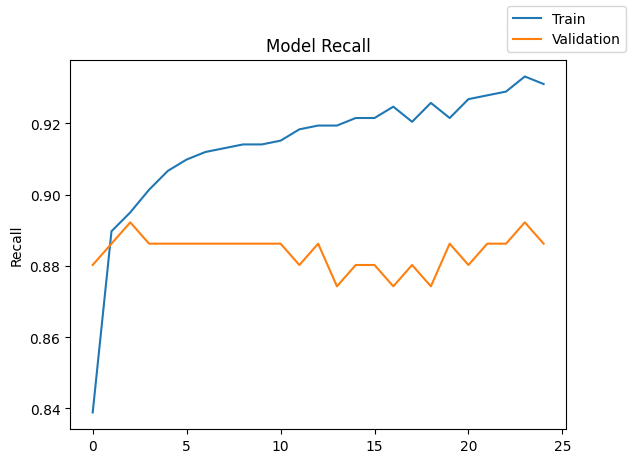

In [108]:
# Draw the plots to observe the change in Recall score on training and validation datasets while model is being trained
plot_performance(history, 'Recall')

In [109]:
# Save the model parameters and performance metrics in the dataframe
results.loc[7] = [3, [64, 8, 4], ['relu', 'relu', 'relu'], 25, 50, '-', '-', '-', 'Adam', '-', 'Balanced', endTime-startTime, history.history['loss'][-1], history.history['val_loss'][-1], history.history['Recall'][-1], history.history['val_Recall'][-1]]
results

Hidden Layers     Neurons          Activation  Epochs Batch Size Dropout  \
0              1           8                relu       1      17000       -   
1              1           8                relu      10         50       -   
2              1           8                relu      25         50       -   
3              1           8                relu      25         50       -   
4              1          64                relu      25         50       -   
5              2     [64, 8]        [relu, relu]      25         50       -   
6              2     [64, 8]        [relu, relu]      25         50       -   
7              3  [64, 8, 4]  [relu, relu, relu]      25         50       -   

  BatchNormalization Weight Initialization Optimizer Learning Rate  \
0                  -                     -       SGD             -   
1                  -                     -       SGD             -   
2                  -                     -       SGD             -   
3                  -                     -      Adam             -   
4                  -                     -      Adam             -   
5                  -                     -      Adam             -   
6                  -                     -      Adam             -   
7                  -                     -      Adam             -   

  Class Weight  Time(secs)  Train_Loss  Val_Loss  Train_Recall  Val_Recall  
0            -    4.232467    0.356876  0.234895      0.223754    0.000000  
1            -   12.431931    0.110806  0.104561      0.498409    0.544910  
2            -   22.581395    0.077632  0.076584      0.659597    0.706587  
3            -   24.618023    0.055756  0.062324      0.799576    0.832335  
4            -   23.753295    0.040713  0.055440      0.867444    0.844311  
5            -   25.468280    0.030187  0.055178      0.900318    0.880240  
6     Balanced   25.644120    0.116325  0.100604      0.927890    0.898204  
7     Balanced   26.183063    0.105960  0.094880      0.931071    0.886228

In [110]:
# Evaluate Accuracy, Recall, Precision and F1 scores for the model using training and validation datasets
model_performance = model_performance_classification_sklearn(model7, x_train, y_train)
model_performance.index = [7]
model_train_perf = pd.concat([model_train_perf, model_performance])

model_performance = model_performance_classification_sklearn(model7, x_val, y_val)
model_performance.index = [7]
model_val_perf = pd.concat([model_val_perf, model_performance])

532/532 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


* Recall score on training data has increased and validation data has reduced
* Model has started to overfit on adding a third hidden layer
* We will not use the 3rd layer as the model has started to overfit
* We will continue using 2 hidden layers in the subsequent models

## Model 8

* We will use 2 hidden layers to this model
* Let's add a dropout value of 0.5 to both the hidden layers while using other parameters from Model 6 and see if it reduces the overfitting

In [111]:
# Clear the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [112]:
# Define a model using two hidden layers with 64 neurons in the first layer and 8 neurons in the second layer
# Add dropout values of 0.5 for each hidden layer
model8 = Sequential()
model8.add(Dense(64, activation='relu', input_dim=x_train.shape[1]))
model8.add(Dropout(0.5))
model8.add(Dense(8, activation='relu'))
model8.add(Dropout(0.5))
model8.add(Dense(1, activation='sigmoid'))
model8.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         2,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │           520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,153 (12.32 KB)

 Trainable params: 3,153 (12.32 KB)

 Non-trainable params: 0 (0.00 B)

In [113]:
# Compile the model using Adam optimizer
model8.compile(loss=loss, optimizer=Adam(), metrics=metric)

In [114]:
startTime = time.time()
history = model8.fit(x_train, y_train, batch_size=50, epochs=25, class_weight=class_weights, validation_data=(x_val, y_val), verbose=2)
endTime = time.time()

Epoch 1/25
340/340 - 4s - 10ms/step - Recall: 0.6034 - loss: 0.6043 - val_Recall: 0.8982 - val_loss: 0.4557
Epoch 2/25
340/340 - 1s - 3ms/step - Recall: 0.7328 - loss: 0.4980 - val_Recall: 0.8982 - val_loss: 0.3745
Epoch 3/25
340/340 - 1s - 3ms/step - Recall: 0.7169 - loss: 0.4310 - val_Recall: 0.8862 - val_loss: 0.3339
Epoch 4/25
340/340 - 1s - 3ms/step - Recall: 0.7402 - loss: 0.4079 - val_Recall: 0.8862 - val_loss: 0.3016
Epoch 5/25
340/340 - 1s - 3ms/step - Recall: 0.7603 - loss: 0.3773 - val_Recall: 0.8802 - val_loss: 0.2526
Epoch 6/25
340/340 - 1s - 3ms/step - Recall: 0.7762 - loss: 0.3623 - val_Recall: 0.8802 - val_loss: 0.2526
Epoch 7/25
340/340 - 1s - 4ms/step - Recall: 0.7815 - loss: 0.3430 - val_Recall: 0.8862 - val_loss: 0.2302
Epoch 8/25
340/340 - 1s - 4ms/step - Recall: 0.7826 - loss: 0.3360 - val_Recall: 0.8862 - val_loss: 0.2386
Epoch 9/25
340/340 - 1s - 2ms/step - Recall: 0.7890 - loss: 0.3210 - val_Recall: 0.8862 - val_loss: 0.2215
Epoch 10/25
340/340 - 1s - 3ms/step 

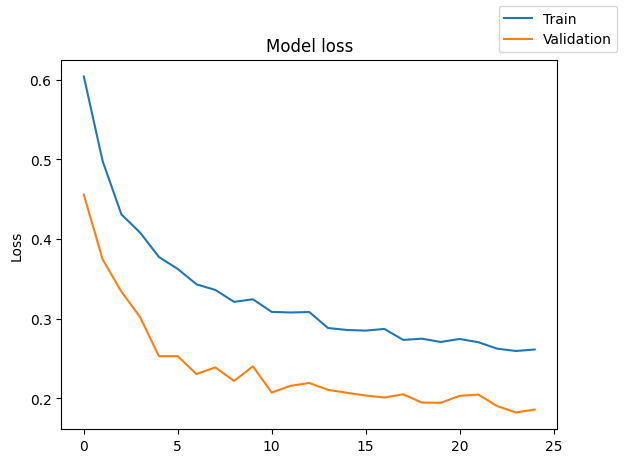

In [115]:
# Draw the plots to observe the change in loss on training and validation datasets while model is being trained
plot_performance(history, 'loss')

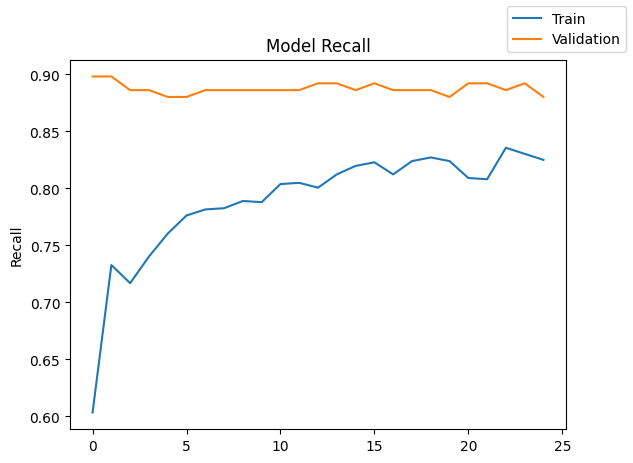

In [116]:
# Draw the plots to observe the change in Recall score on training and validation datasets while model is being trained
plot_performance(history, 'Recall')

In [117]:
# Save the model parameters and performance metrics in the dataframe
results.loc[8] = [2, [64, 8], ['relu', 'relu'], 25, 50, '[0.5, 0.5]', '-', '-', 'Adam', '-', 'Balanced', endTime-startTime, history.history['loss'][-1], history.history['val_loss'][-1], history.history['Recall'][-1], history.history['val_Recall'][-1]]
results

Hidden Layers     Neurons          Activation  Epochs Batch Size  \
0              1           8                relu       1      17000   
1              1           8                relu      10         50   
2              1           8                relu      25         50   
3              1           8                relu      25         50   
4              1          64                relu      25         50   
5              2     [64, 8]        [relu, relu]      25         50   
6              2     [64, 8]        [relu, relu]      25         50   
7              3  [64, 8, 4]  [relu, relu, relu]      25         50   
8              2     [64, 8]        [relu, relu]      25         50   

      Dropout BatchNormalization Weight Initialization Optimizer  \
0           -                  -                     -       SGD   
1           -                  -                     -       SGD   
2           -                  -                     -       SGD   
3           -                  -                     -      Adam   
4           -                  -                     -      Adam   
5           -                  -                     -      Adam   
6           -                  -                     -      Adam   
7           -                  -                     -      Adam   
8  [0.5, 0.5]                  -                     -      Adam   

  Learning Rate Class Weight  Time(secs)  Train_Loss  Val_Loss  Train_Recall  \
0             -            -    4.232467    0.356876  0.234895      0.223754   
1             -            -   12.431931    0.110806  0.104561      0.498409   
2             -            -   22.581395    0.077632  0.076584      0.659597   
3             -            -   24.618023    0.055756  0.062324      0.799576   
4             -            -   23.753295    0.040713  0.055440      0.867444   
5             -            -   25.468280    0.030187  0.055178      0.900318   
6             -     Balanced   25.644120    0.116325  0.100604      0.927890   
7             -     Balanced   26.183063    0.105960  0.094880      0.931071   
8             -     Balanced   31.231540    0.261065  0.185567      0.825027   

   Val_Recall  
0    0.000000  
1    0.544910  
2    0.706587  
3    0.832335  
4    0.844311  
5    0.880240  
6    0.898204  
7    0.886228  
8    0.880240

In [118]:
# Evaluate Accuracy, Recall, Precision and F1 scores for the model using training and validation datasets
model_performance = model_performance_classification_sklearn(model8, x_train, y_train)
model_performance.index = [8]
model_train_perf = pd.concat([model_train_perf, model_performance])

model_performance = model_performance_classification_sklearn(model8, x_val, y_val)
model_performance.index = [8]
model_val_perf = pd.concat([model_val_perf, model_performance])

532/532 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


* Recall score on the validation dataset is considerably higher than the recall score on the training dataset
* Recall score on the training dataset has reduced by almost 10% points, and it is not learning well enough
* We are dropping too many neurons in both the layers, resulting into not learning enough

## Model 9

* Let's use a lower dropout value on both hidden layers and see the performance
* We will reuse the other parameters that were used in the previous model


In [119]:
# Clear the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [120]:
# Define a model using two hidden layers with 64 neurons in the first layer and 8 neurons in the second layer
# Add dropout values of 0.3 for each hidden layer
model9 = Sequential()
model9.add(Dense(64, activation='relu', input_dim=x_train.shape[1]))
model9.add(Dropout(0.3))
model9.add(Dense(8, activation='relu'))
model9.add(Dropout(0.3))
model9.add(Dense(1, activation='sigmoid'))
model9.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         2,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │           520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,153 (12.32 KB)

 Trainable params: 3,153 (12.32 KB)

 Non-trainable params: 0 (0.00 B)

In [121]:
# Compile the model using Adam optimizer
model9.compile(loss=loss, optimizer=Adam(), metrics=metric)

In [122]:
# Train the model using class weights, batch size of 50 and epochs as 25
startTime = time.time()
history = model9.fit(x_train, y_train, batch_size=50, epochs=25, class_weight=class_weights, validation_data=(x_val, y_val), verbose=2)
endTime = time.time()

Epoch 1/25
340/340 - 4s - 11ms/step - Recall: 0.7455 - loss: 0.5091 - val_Recall: 0.8862 - val_loss: 0.3579
Epoch 2/25
340/340 - 1s - 3ms/step - Recall: 0.8240 - loss: 0.3733 - val_Recall: 0.8683 - val_loss: 0.2646
Epoch 3/25
340/340 - 1s - 3ms/step - Recall: 0.8431 - loss: 0.3238 - val_Recall: 0.8802 - val_loss: 0.2282
Epoch 4/25
340/340 - 1s - 3ms/step - Recall: 0.8643 - loss: 0.3009 - val_Recall: 0.8802 - val_loss: 0.1967
Epoch 5/25
340/340 - 1s - 3ms/step - Recall: 0.8600 - loss: 0.2743 - val_Recall: 0.8802 - val_loss: 0.1881
Epoch 6/25
340/340 - 1s - 3ms/step - Recall: 0.8568 - loss: 0.2803 - val_Recall: 0.8922 - val_loss: 0.2026
Epoch 7/25
340/340 - 1s - 3ms/step - Recall: 0.8600 - loss: 0.2631 - val_Recall: 0.8862 - val_loss: 0.1840
Epoch 8/25
340/340 - 1s - 2ms/step - Recall: 0.8579 - loss: 0.2509 - val_Recall: 0.8922 - val_loss: 0.1801
Epoch 9/25
340/340 - 1s - 3ms/step - Recall: 0.8685 - loss: 0.2450 - val_Recall: 0.8922 - val_loss: 0.1836
Epoch 10/25
340/340 - 1s - 4ms/step 

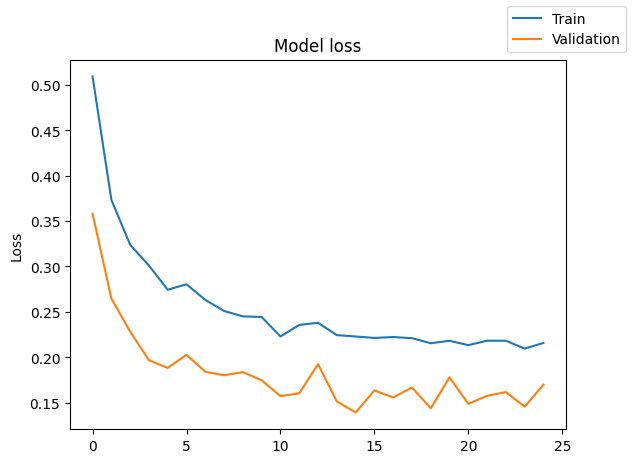

In [123]:
# Draw the plots to observe the change in loss on training and validation datasets while model is being trained
plot_performance(history, 'loss')

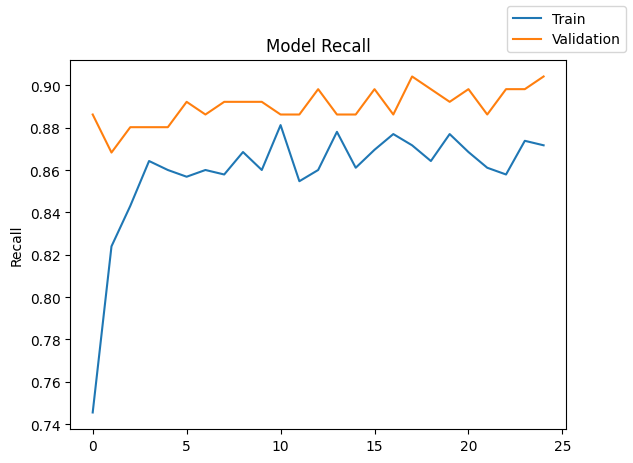

In [124]:
# Draw the plots to observe the change in Recall score on training and validation datasets while model is being trained
plot_performance(history, 'Recall')

In [125]:
# Save the model parameters and performance metrics in the dataframe
results.loc[9] = [2, [64, 8], ['relu', 'relu'], 25, 50, '[0.3, 0.3]', '-', '-', 'Adam', '-', 'Balanced', endTime-startTime, history.history['loss'][-1], history.history['val_loss'][-1], history.history['Recall'][-1], history.history['val_Recall'][-1]]
results

Hidden Layers     Neurons          Activation  Epochs Batch Size  \
0              1           8                relu       1      17000   
1              1           8                relu      10         50   
2              1           8                relu      25         50   
3              1           8                relu      25         50   
4              1          64                relu      25         50   
5              2     [64, 8]        [relu, relu]      25         50   
6              2     [64, 8]        [relu, relu]      25         50   
7              3  [64, 8, 4]  [relu, relu, relu]      25         50   
8              2     [64, 8]        [relu, relu]      25         50   
9              2     [64, 8]        [relu, relu]      25         50   

      Dropout BatchNormalization Weight Initialization Optimizer  \
0           -                  -                     -       SGD   
1           -                  -                     -       SGD   
2           -                  -                     -       SGD   
3           -                  -                     -      Adam   
4           -                  -                     -      Adam   
5           -                  -                     -      Adam   
6           -                  -                     -      Adam   
7           -                  -                     -      Adam   
8  [0.5, 0.5]                  -                     -      Adam   
9  [0.3, 0.3]                  -                     -      Adam   

  Learning Rate Class Weight  Time(secs)  Train_Loss  Val_Loss  Train_Recall  \
0             -            -    4.232467    0.356876  0.234895      0.223754   
1             -            -   12.431931    0.110806  0.104561      0.498409   
2             -            -   22.581395    0.077632  0.076584      0.659597   
3             -            -   24.618023    0.055756  0.062324      0.799576   
4             -            -   23.753295    0.040713  0.055440      0.867444   
5             -            -   25.468280    0.030187  0.055178      0.900318   
6             -     Balanced   25.644120    0.116325  0.100604      0.927890   
7             -     Balanced   26.183063    0.105960  0.094880      0.931071   
8             -     Balanced   31.231540    0.261065  0.185567      0.825027   
9             -     Balanced   26.181190    0.215705  0.169763      0.871686   

   Val_Recall  
0    0.000000  
1    0.544910  
2    0.706587  
3    0.832335  
4    0.844311  
5    0.880240  
6    0.898204  
7    0.886228  
8    0.880240  
9    0.904192

In [126]:
# Evaluate Accuracy, Recall, Precision and F1 scores for the model using training and validation datasets
model_performance = model_performance_classification_sklearn(model9, x_train, y_train)
model_performance.index = [9]
model_train_perf = pd.concat([model_train_perf, model_performance])

model_performance = model_performance_classification_sklearn(model9, x_val, y_val)
model_performance.index = [9]
model_val_perf = pd.concat([model_val_perf, model_performance])

532/532 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


* Recall score on the validation dataset is still higher than the recall score on the training dataset
* Let's see if we can improve its performance further by slighly lowering the dropout values

## Model 10

* Let's reduce the dropout values for both hidden layers further to 0.2 and 0.1 for the first and the second hidden layer respectively
* We will reuse the other parameters that were used in the previous model

In [127]:
# Clear the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [128]:
# Define a model using two hidden layers with 64 neurons in the first layer and 8 neurons in the second layer
# Add dropout values of 0.2 and 0.1 for the first and the second hidden layer respectively
model10 = Sequential()
model10.add(Dense(64, activation='relu', kernel_initializer='he_normal', input_dim=x_train.shape[1]))
model10.add(Dropout(0.2))
model10.add(Dense(8, activation='relu', kernel_initializer='he_normal'))
model10.add(Dropout(0.1))
model10.add(Dense(1, activation='sigmoid'))
model10.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         2,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │           520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,153 (12.32 KB)

 Trainable params: 3,153 (12.32 KB)

 Non-trainable params: 0 (0.00 B)

In [129]:
# Compile the model using Adam optimizer
model10.compile(loss=loss, optimizer=Adam(), metrics=metric)

In [130]:
# Train the model using class weights, batch size of 50 and epochs as 25
startTime = time.time()
history = model10.fit(x_train, y_train, batch_size=50, epochs=25, class_weight=class_weights, validation_data=(x_val, y_val), verbose=2)
endTime = time.time()

Epoch 1/25
340/340 - 4s - 10ms/step - Recall: 0.7264 - loss: 0.5136 - val_Recall: 0.9102 - val_loss: 0.3500
Epoch 2/25
340/340 - 1s - 2ms/step - Recall: 0.8452 - loss: 0.3544 - val_Recall: 0.9042 - val_loss: 0.2667
Epoch 3/25
340/340 - 1s - 3ms/step - Recall: 0.8643 - loss: 0.2994 - val_Recall: 0.8982 - val_loss: 0.2167
Epoch 4/25
340/340 - 1s - 2ms/step - Recall: 0.8706 - loss: 0.2729 - val_Recall: 0.8922 - val_loss: 0.1895
Epoch 5/25
340/340 - 1s - 3ms/step - Recall: 0.8717 - loss: 0.2552 - val_Recall: 0.8922 - val_loss: 0.1812
Epoch 6/25
340/340 - 1s - 4ms/step - Recall: 0.8791 - loss: 0.2419 - val_Recall: 0.8982 - val_loss: 0.1680
Epoch 7/25
340/340 - 1s - 2ms/step - Recall: 0.8696 - loss: 0.2331 - val_Recall: 0.8982 - val_loss: 0.1645
Epoch 8/25
340/340 - 1s - 3ms/step - Recall: 0.8865 - loss: 0.2245 - val_Recall: 0.8922 - val_loss: 0.1578
Epoch 9/25
340/340 - 1s - 3ms/step - Recall: 0.8802 - loss: 0.2163 - val_Recall: 0.9042 - val_loss: 0.1430
Epoch 10/25
340/340 - 1s - 3ms/step 

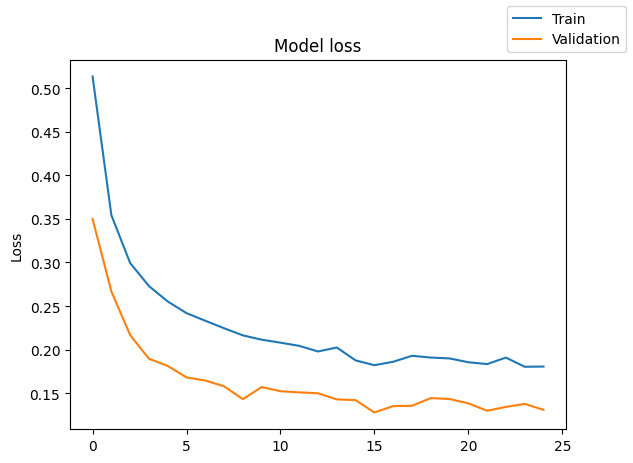

In [131]:
# Draw the plots to observe the change in loss on training and validation datasets while model is being trained
plot_performance(history, 'loss')

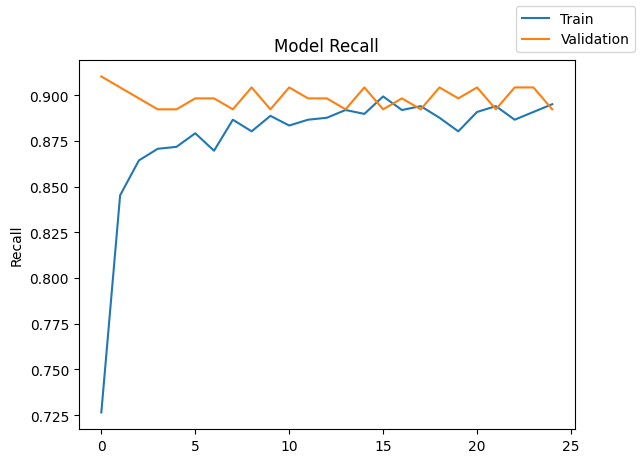

In [132]:
# Draw the plots to observe the change in Recall score on training and validation datasets while model is being trained
plot_performance(history, 'Recall')

In [133]:
# Save the model parameters and performance metrics in the dataframe
results.loc[10] = [2, [64, 8], ['relu', 'relu'], 25, 50, '[0.2, 0.1]', '-', '-', 'Adam', '-', 'Balanced', endTime-startTime, history.history['loss'][-1], history.history['val_loss'][-1], history.history['Recall'][-1], history.history['val_Recall'][-1]]
results

Hidden Layers     Neurons          Activation  Epochs Batch Size  \
0               1           8                relu       1      17000   
1               1           8                relu      10         50   
2               1           8                relu      25         50   
3               1           8                relu      25         50   
4               1          64                relu      25         50   
5               2     [64, 8]        [relu, relu]      25         50   
6               2     [64, 8]        [relu, relu]      25         50   
7               3  [64, 8, 4]  [relu, relu, relu]      25         50   
8               2     [64, 8]        [relu, relu]      25         50   
9               2     [64, 8]        [relu, relu]      25         50   
10              2     [64, 8]        [relu, relu]      25         50   

       Dropout BatchNormalization Weight Initialization Optimizer  \
0            -                  -                     -       SGD   
1            -                  -                     -       SGD   
2            -                  -                     -       SGD   
3            -                  -                     -      Adam   
4            -                  -                     -      Adam   
5            -                  -                     -      Adam   
6            -                  -                     -      Adam   
7            -                  -                     -      Adam   
8   [0.5, 0.5]                  -                     -      Adam   
9   [0.3, 0.3]                  -                     -      Adam   
10  [0.2, 0.1]                  -                     -      Adam   

   Learning Rate Class Weight  Time(secs)  Train_Loss  Val_Loss  Train_Recall  \
0              -            -    4.232467    0.356876  0.234895      0.223754   
1              -            -   12.431931    0.110806  0.104561      0.498409   
2              -            -   22.581395    0.077632  0.076584      0.659597   
3              -            -   24.618023    0.055756  0.062324      0.799576   
4              -            -   23.753295    0.040713  0.055440      0.867444   
5              -            -   25.468280    0.030187  0.055178      0.900318   
6              -     Balanced   25.644120    0.116325  0.100604      0.927890   
7              -     Balanced   26.183063    0.105960  0.094880      0.931071   
8              -     Balanced   31.231540    0.261065  0.185567      0.825027   
9              -     Balanced   26.181190    0.215705  0.169763      0.871686   
10             -     Balanced   25.543280    0.180485  0.130818      0.895016   

    Val_Recall  
0     0.000000  
1     0.544910  
2     0.706587  
3     0.832335  
4     0.844311  
5     0.880240  
6     0.898204  
7     0.886228  
8     0.880240  
9     0.904192  
10    0.892216

In [134]:
# Evaluate Accuracy, Recall, Precision and F1 scores for the model using training and validation datasets
model_performance = model_performance_classification_sklearn(model10, x_train, y_train)
model_performance.index = [10]
model_train_perf = pd.concat([model_train_perf, model_performance])

model_performance = model_performance_classification_sklearn(model10, x_val, y_val)
model_performance.index = [10]
model_val_perf = pd.concat([model_val_perf, model_performance])

532/532 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


* Overfitting has reduced compared to model 6
* Recall scores on the training and validation datasets are almost similar with very less difference
* Model appears to be generalizing fairly good
* Let's see if there is any scope for improving the recall scores further

## Model 11

* Let's increase the learning rate of the model to see if the performance improves
* As we are increasing the learning rate, we will reduce the number of epochs to avoid overfitting
* We will reuse the other parameters that were used in the previous model

In [135]:
# Clear the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [136]:
# Define a model using two hidden layers with 64 neurons in the first layer and 8 neurons in the second layer
# Add dropout values of 0.2 and 0.1 for the first and the second hidden layer respectively
model11 = Sequential()
model11.add(Dense(64, activation='relu', input_dim=x_train.shape[1]))
model11.add(Dropout(0.2))
model11.add(Dense(8, activation='relu'))
model11.add(Dropout(0.1))
model11.add(Dense(1, activation='sigmoid'))
model11.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         2,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │           520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,153 (12.32 KB)

 Trainable params: 3,153 (12.32 KB)

 Non-trainable params: 0 (0.00 B)

In [137]:
# Compile the model using Adam optimizer along with learning rate of 1e-2 (or 0.01)
model11.compile(loss=loss, optimizer=Adam(learning_rate=1e-2), metrics=metric)

In [138]:
# Train the model using class weights, batch size of 50 and epochs as 15
startTime = time.time()
history = model11.fit(x_train, y_train, batch_size=50, epochs=15, class_weight=class_weights, validation_data=(x_val, y_val), verbose=2)
endTime = time.time()

Epoch 1/15
340/340 - 4s - 12ms/step - Recall: 0.8409 - loss: 0.3609 - val_Recall: 0.8922 - val_loss: 0.2624
Epoch 2/15
340/340 - 1s - 3ms/step - Recall: 0.8643 - loss: 0.2740 - val_Recall: 0.8862 - val_loss: 0.1819
Epoch 3/15
340/340 - 1s - 3ms/step - Recall: 0.8685 - loss: 0.2408 - val_Recall: 0.8922 - val_loss: 0.1710
Epoch 4/15
340/340 - 1s - 2ms/step - Recall: 0.8717 - loss: 0.2281 - val_Recall: 0.9102 - val_loss: 0.1535
Epoch 5/15
340/340 - 1s - 3ms/step - Recall: 0.8717 - loss: 0.2324 - val_Recall: 0.8862 - val_loss: 0.1679
Epoch 6/15
340/340 - 1s - 3ms/step - Recall: 0.8738 - loss: 0.2270 - val_Recall: 0.8922 - val_loss: 0.1557
Epoch 7/15
340/340 - 1s - 2ms/step - Recall: 0.8780 - loss: 0.2147 - val_Recall: 0.8802 - val_loss: 0.1701
Epoch 8/15
340/340 - 1s - 2ms/step - Recall: 0.8780 - loss: 0.2184 - val_Recall: 0.8922 - val_loss: 0.1555
Epoch 9/15
340/340 - 1s - 2ms/step - Recall: 0.8844 - loss: 0.2098 - val_Recall: 0.8862 - val_loss: 0.1332
Epoch 10/15
340/340 - 1s - 2ms/step 

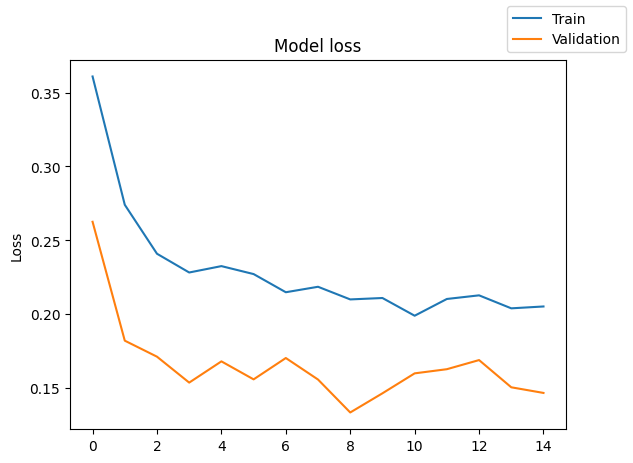

In [139]:
# Draw the plots to observe the change in loss on training and validation datasets while model is being trained
plot_performance(history, 'loss')

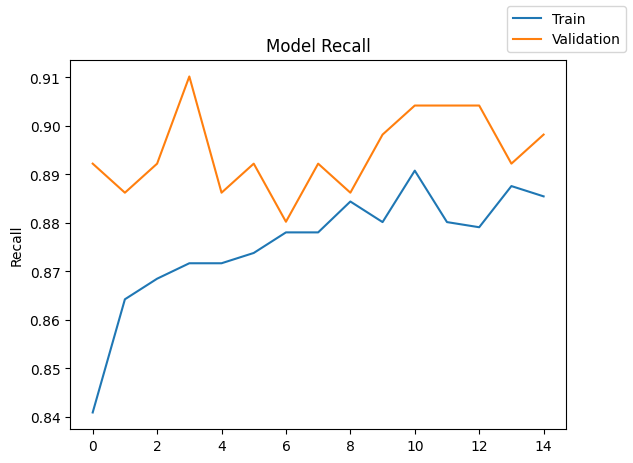

In [140]:
# Draw the plots to observe the change in Recall score on training and validation datasets while model is being trained
plot_performance(history, 'Recall')

In [141]:
# Save the model parameters and performance metrics in the dataframe
results.loc[11] = [2, [64, 8], ['relu', 'relu'], 35, 50, '[0.2, 0.1]', '-', '-', 'Adam', '1e-2', 'Balanced', endTime-startTime, history.history['loss'][-1], history.history['val_loss'][-1], history.history['Recall'][-1], history.history['val_Recall'][-1]]
results

Hidden Layers     Neurons          Activation  Epochs Batch Size  \
0               1           8                relu       1      17000   
1               1           8                relu      10         50   
2               1           8                relu      25         50   
3               1           8                relu      25         50   
4               1          64                relu      25         50   
5               2     [64, 8]        [relu, relu]      25         50   
6               2     [64, 8]        [relu, relu]      25         50   
7               3  [64, 8, 4]  [relu, relu, relu]      25         50   
8               2     [64, 8]        [relu, relu]      25         50   
9               2     [64, 8]        [relu, relu]      25         50   
10              2     [64, 8]        [relu, relu]      25         50   
11              2     [64, 8]        [relu, relu]      35         50   

       Dropout BatchNormalization Weight Initialization Optimizer  \
0            -                  -                     -       SGD   
1            -                  -                     -       SGD   
2            -                  -                     -       SGD   
3            -                  -                     -      Adam   
4            -                  -                     -      Adam   
5            -                  -                     -      Adam   
6            -                  -                     -      Adam   
7            -                  -                     -      Adam   
8   [0.5, 0.5]                  -                     -      Adam   
9   [0.3, 0.3]                  -                     -      Adam   
10  [0.2, 0.1]                  -                     -      Adam   
11  [0.2, 0.1]                  -                     -      Adam   

   Learning Rate Class Weight  Time(secs)  Train_Loss  Val_Loss  Train_Recall  \
0              -            -    4.232467    0.356876  0.234895      0.223754   
1              -            -   12.431931    0.110806  0.104561      0.498409   
2              -            -   22.581395    0.077632  0.076584      0.659597   
3              -            -   24.618023    0.055756  0.062324      0.799576   
4              -            -   23.753295    0.040713  0.055440      0.867444   
5              -            -   25.468280    0.030187  0.055178      0.900318   
6              -     Balanced   25.644120    0.116325  0.100604      0.927890   
7              -     Balanced   26.183063    0.105960  0.094880      0.931071   
8              -     Balanced   31.231540    0.261065  0.185567      0.825027   
9              -     Balanced   26.181190    0.215705  0.169763      0.871686   
10             -     Balanced   25.543280    0.180485  0.130818      0.895016   
11          1e-2     Balanced   16.876800    0.205056  0.146468      0.885472   

    Val_Recall  
0     0.000000  
1     0.544910  
2     0.706587  
3     0.832335  
4     0.844311  
5     0.880240  
6     0.898204  
7     0.886228  
8     0.880240  
9     0.904192  
10    0.892216  
11    0.898204

In [142]:
# Evaluate Accuracy, Recall, Precision and F1 scores for the model using training and validation datasets
model_performance = model_performance_classification_sklearn(model11, x_train, y_train)
model_performance.index = [11]
model_train_perf = pd.concat([model_train_perf, model_performance])

model_performance = model_performance_classification_sklearn(model11, x_val, y_val)
model_performance.index = [11]
model_val_perf = pd.concat([model_val_perf, model_performance])

532/532 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


* Performance has reduced slightly compared to model 10
* Let's try using batch normalization to see if the performance improves further

## Model 12

* Let's use batch normalization to see if we can improve the performance further on model 10
* We will reuse other model parameters that were used in model 10

In [143]:
# Clear the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [144]:
# Define a model using two hidden layers with 64 neurons in the first layer and 8 neurons in the second layer
# Add dropout values of 0.2 and 0.1 for the first and the second hidden layer respectively
# Add batch normalization layers after the hidden layers
model12 = Sequential()
model12.add(Dense(64, activation='relu', input_dim=x_train.shape[1]))
model12.add(BatchNormalization())
model12.add(Dropout(0.2))
model12.add(Dense(8, activation='relu'))
model12.add(BatchNormalization())
model12.add(Dropout(0.1))
model12.add(Dense(1, activation='sigmoid'))
model12.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         2,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │           520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 8)              │            32 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,441 (13.44 KB)

 Trainable params: 3,297 (12.88 KB)

 Non-trainable params: 144 (576.00 B)

In [145]:
# Compile the model using Adam optimizer
model12.compile(loss=loss, optimizer=Adam(), metrics=metric)

In [146]:
# Train the model using class weights, batch size of 50 and epochs as 25
startTime = time.time()
history = model12.fit(x_train, y_train, batch_size=50, epochs=25, class_weight=class_weights, validation_data=(x_val, y_val), verbose=2)
endTime = time.time()

Epoch 1/25
340/340 - 5s - 14ms/step - Recall: 0.8568 - loss: 0.4465 - val_Recall: 0.8922 - val_loss: 0.2940
Epoch 2/25
340/340 - 1s - 3ms/step - Recall: 0.8759 - loss: 0.2959 - val_Recall: 0.8862 - val_loss: 0.2035
Epoch 3/25
340/340 - 1s - 3ms/step - Recall: 0.8749 - loss: 0.2662 - val_Recall: 0.8922 - val_loss: 0.1804
Epoch 4/25
340/340 - 1s - 3ms/step - Recall: 0.8823 - loss: 0.2482 - val_Recall: 0.8802 - val_loss: 0.1726
Epoch 5/25
340/340 - 1s - 4ms/step - Recall: 0.8876 - loss: 0.2378 - val_Recall: 0.8922 - val_loss: 0.1667
Epoch 6/25
340/340 - 1s - 3ms/step - Recall: 0.8887 - loss: 0.2309 - val_Recall: 0.8862 - val_loss: 0.1505
Epoch 7/25
340/340 - 1s - 3ms/step - Recall: 0.8940 - loss: 0.2201 - val_Recall: 0.8862 - val_loss: 0.1518
Epoch 8/25
340/340 - 1s - 3ms/step - Recall: 0.8897 - loss: 0.2161 - val_Recall: 0.8862 - val_loss: 0.1353
Epoch 9/25
340/340 - 1s - 3ms/step - Recall: 0.8929 - loss: 0.2097 - val_Recall: 0.8922 - val_loss: 0.1424
Epoch 10/25
340/340 - 1s - 3ms/step 

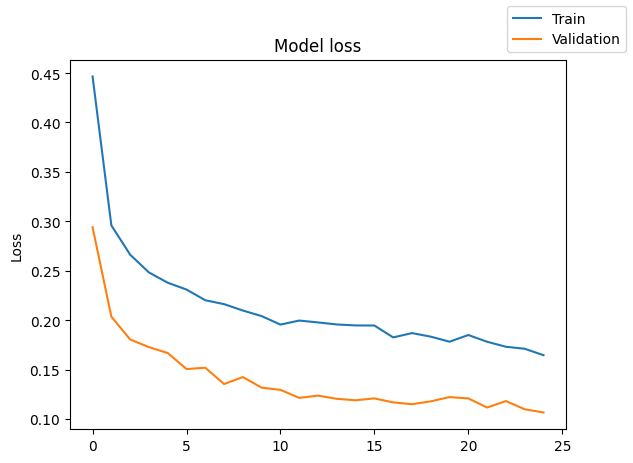

In [147]:
# Draw the plots to observe the change in loss on training and validation datasets while model is being trained
plot_performance(history, 'loss')

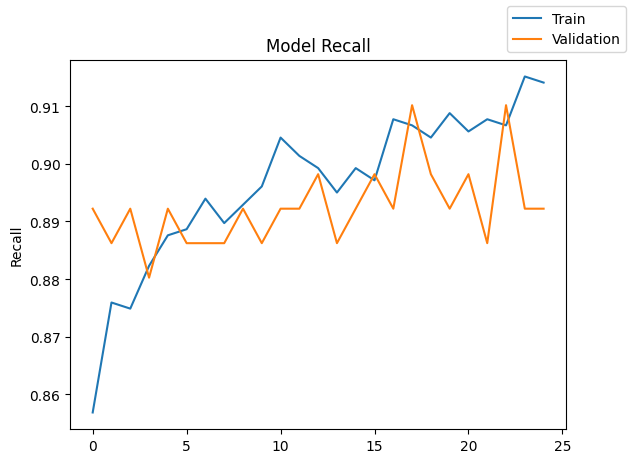

In [148]:
# Draw the plots to observe the change in Recall score on training and validation datasets while model is being trained
plot_performance(history, 'Recall')

In [149]:
# Save the model parameters and performance metrics in the dataframe
results.loc[12] = [2, [64, 8], ['relu', 'relu'], 25, 50, '[0.2, 0.1]', 'Yes', '-', 'Adam', '-', 'Balanced', endTime-startTime, history.history['loss'][-1], history.history['val_loss'][-1], history.history['Recall'][-1], history.history['val_Recall'][-1]]
results

Hidden Layers     Neurons          Activation  Epochs Batch Size  \
0               1           8                relu       1      17000   
1               1           8                relu      10         50   
2               1           8                relu      25         50   
3               1           8                relu      25         50   
4               1          64                relu      25         50   
5               2     [64, 8]        [relu, relu]      25         50   
6               2     [64, 8]        [relu, relu]      25         50   
7               3  [64, 8, 4]  [relu, relu, relu]      25         50   
8               2     [64, 8]        [relu, relu]      25         50   
9               2     [64, 8]        [relu, relu]      25         50   
10              2     [64, 8]        [relu, relu]      25         50   
11              2     [64, 8]        [relu, relu]      35         50   
12              2     [64, 8]        [relu, relu]      25         50   

       Dropout BatchNormalization Weight Initialization Optimizer  \
0            -                  -                     -       SGD   
1            -                  -                     -       SGD   
2            -                  -                     -       SGD   
3            -                  -                     -      Adam   
4            -                  -                     -      Adam   
5            -                  -                     -      Adam   
6            -                  -                     -      Adam   
7            -                  -                     -      Adam   
8   [0.5, 0.5]                  -                     -      Adam   
9   [0.3, 0.3]                  -                     -      Adam   
10  [0.2, 0.1]                  -                     -      Adam   
11  [0.2, 0.1]                  -                     -      Adam   
12  [0.2, 0.1]                Yes                     -      Adam   

   Learning Rate Class Weight  Time(secs)  Train_Loss  Val_Loss  Train_Recall  \
0              -            -    4.232467    0.356876  0.234895      0.223754   
1              -            -   12.431931    0.110806  0.104561      0.498409   
2              -            -   22.581395    0.077632  0.076584      0.659597   
3              -            -   24.618023    0.055756  0.062324      0.799576   
4              -            -   23.753295    0.040713  0.055440      0.867444   
5              -            -   25.468280    0.030187  0.055178      0.900318   
6              -     Balanced   25.644120    0.116325  0.100604      0.927890   
7              -     Balanced   26.183063    0.105960  0.094880      0.931071   
8              -     Balanced   31.231540    0.261065  0.185567      0.825027   
9              -     Balanced   26.181190    0.215705  0.169763      0.871686   
10             -     Balanced   25.543280    0.180485  0.130818      0.895016   
11          1e-2     Balanced   16.876800    0.205056  0.146468      0.885472   
12             -     Balanced   32.776847    0.164486  0.106514      0.914104   

    Val_Recall  
0     0.000000  
1     0.544910  
2     0.706587  
3     0.832335  
4     0.844311  
5     0.880240  
6     0.898204  
7     0.886228  
8     0.880240  
9     0.904192  
10    0.892216  
11    0.898204  
12    0.892216

In [150]:
# Evaluate Accuracy, Recall, Precision and F1 scores for the model using training and validation datasets
model_performance = model_performance_classification_sklearn(model12, x_train, y_train)
model_performance.index = [12]
model_train_perf = pd.concat([model_train_perf, model_performance])

model_performance = model_performance_classification_sklearn(model12, x_val, y_val)
model_performance.index = [12]
model_val_perf = pd.concat([model_val_perf, model_performance])

532/532 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


* Performance on both training has improved, but reduced slightly on the training dataset
* The model is appearing to overfit the data slightly
* Let's see if we can improve the performance futher using weight initialization

## Model 13

* Let's see if initializaing weights can improve the performance further
* We will reuse the other parameters that were used in the previous model

In [151]:
# Clear the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [152]:
# Define a model using two hidden layers with 64 neurons in the first layer and 8 neurons in the second layer, while using he_normal as weight initializer
# Add dropout values of 0.2 and 0.1 for the first and the second hidden layer respectively
# Add batch normalization layers after the hidden layers
model13 = Sequential()
model13.add(Dense(64, activation='relu', kernel_initializer='he_normal', input_dim=x_train.shape[1]))
model13.add(BatchNormalization())
model13.add(Dropout(0.2))
model13.add(Dense(8, activation='relu', kernel_initializer='he_normal'))
model13.add(BatchNormalization())
model13.add(Dropout(0.1))
model13.add(Dense(1, activation='sigmoid', kernel_initializer='he_normal'))
model13.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         2,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │           520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 8)              │            32 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,441 (13.44 KB)

 Trainable params: 3,297 (12.88 KB)

 Non-trainable params: 144 (576.00 B)

In [153]:
# Compile the model using Adam optimizer
model13.compile(loss=loss, optimizer=Adam(), metrics=metric)

In [154]:
# Train the model using class weights, batch size of 50 and epochs as 25
startTime = time.time()
history = model13.fit(x_train, y_train, batch_size=50, epochs=25, class_weight=class_weights, validation_data=(x_val, y_val), verbose=2)
endTime = time.time()

Epoch 1/25
340/340 - 5s - 14ms/step - Recall: 0.8282 - loss: 0.5287 - val_Recall: 0.8922 - val_loss: 0.3487
Epoch 2/25
340/340 - 1s - 3ms/step - Recall: 0.8643 - loss: 0.3311 - val_Recall: 0.8862 - val_loss: 0.2455
Epoch 3/25
340/340 - 1s - 3ms/step - Recall: 0.8749 - loss: 0.2862 - val_Recall: 0.8922 - val_loss: 0.1797
Epoch 4/25
340/340 - 1s - 3ms/step - Recall: 0.8759 - loss: 0.2657 - val_Recall: 0.8922 - val_loss: 0.1795
Epoch 5/25
340/340 - 1s - 3ms/step - Recall: 0.8876 - loss: 0.2460 - val_Recall: 0.8982 - val_loss: 0.1563
Epoch 6/25
340/340 - 1s - 4ms/step - Recall: 0.8855 - loss: 0.2401 - val_Recall: 0.8982 - val_loss: 0.1582
Epoch 7/25
340/340 - 2s - 6ms/step - Recall: 0.8834 - loss: 0.2377 - val_Recall: 0.9042 - val_loss: 0.1488
Epoch 8/25
340/340 - 1s - 3ms/step - Recall: 0.8961 - loss: 0.2225 - val_Recall: 0.8862 - val_loss: 0.1266
Epoch 9/25
340/340 - 1s - 3ms/step - Recall: 0.8971 - loss: 0.2236 - val_Recall: 0.9042 - val_loss: 0.1406
Epoch 10/25
340/340 - 1s - 3ms/step 

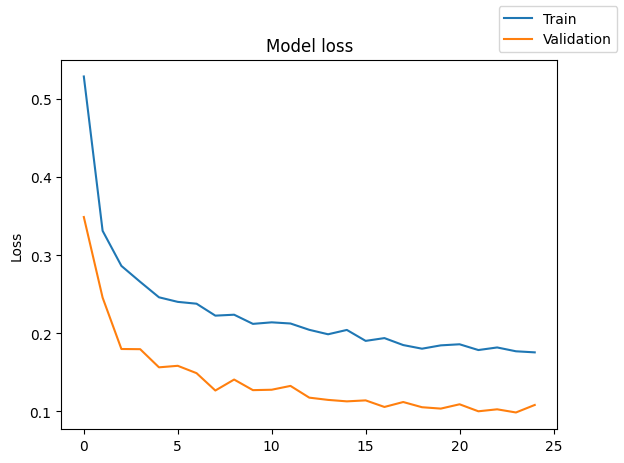

In [155]:
# Draw the plots to observe the change in loss on training and validation datasets while model is being trained
plot_performance(history, 'loss')

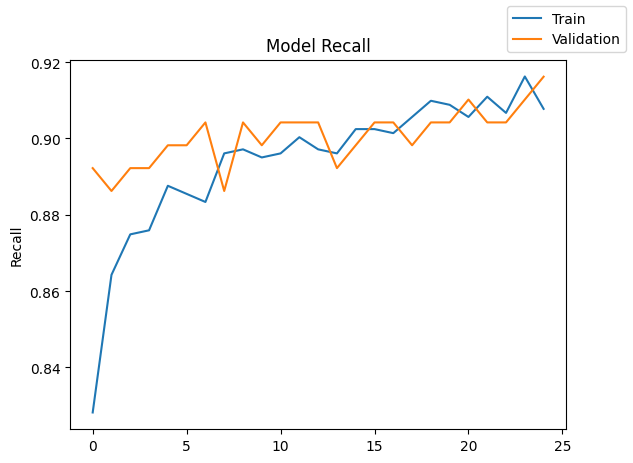

In [156]:
# Draw the plots to observe the change in Recall score on training and validation datasets while model is being trained
plot_performance(history, 'Recall')

In [157]:
# Save the model parameters and performance metrics in the dataframe
results.loc[13] = [2, [64, 8], ['relu', 'relu'], 25, 50, '[0.2, 0.1]', '-', 'he_normal', 'Adam', '-', 'Balanced', endTime-startTime, history.history['loss'][-1], history.history['val_loss'][-1], history.history['Recall'][-1], history.history['val_Recall'][-1]]
results

Hidden Layers     Neurons          Activation  Epochs Batch Size  \
0               1           8                relu       1      17000   
1               1           8                relu      10         50   
2               1           8                relu      25         50   
3               1           8                relu      25         50   
4               1          64                relu      25         50   
5               2     [64, 8]        [relu, relu]      25         50   
6               2     [64, 8]        [relu, relu]      25         50   
7               3  [64, 8, 4]  [relu, relu, relu]      25         50   
8               2     [64, 8]        [relu, relu]      25         50   
9               2     [64, 8]        [relu, relu]      25         50   
10              2     [64, 8]        [relu, relu]      25         50   
11              2     [64, 8]        [relu, relu]      35         50   
12              2     [64, 8]        [relu, relu]      25         50   
13              2     [64, 8]        [relu, relu]      25         50   

       Dropout BatchNormalization Weight Initialization Optimizer  \
0            -                  -                     -       SGD   
1            -                  -                     -       SGD   
2            -                  -                     -       SGD   
3            -                  -                     -      Adam   
4            -                  -                     -      Adam   
5            -                  -                     -      Adam   
6            -                  -                     -      Adam   
7            -                  -                     -      Adam   
8   [0.5, 0.5]                  -                     -      Adam   
9   [0.3, 0.3]                  -                     -      Adam   
10  [0.2, 0.1]                  -                     -      Adam   
11  [0.2, 0.1]                  -                     -      Adam   
12  [0.2, 0.1]                Yes                     -      Adam   
13  [0.2, 0.1]                  -             he_normal      Adam   

   Learning Rate Class Weight  Time(secs)  Train_Loss  Val_Loss  Train_Recall  \
0              -            -    4.232467    0.356876  0.234895      0.223754   
1              -            -   12.431931    0.110806  0.104561      0.498409   
2              -            -   22.581395    0.077632  0.076584      0.659597   
3              -            -   24.618023    0.055756  0.062324      0.799576   
4              -            -   23.753295    0.040713  0.055440      0.867444   
5              -            -   25.468280    0.030187  0.055178      0.900318   
6              -     Balanced   25.644120    0.116325  0.100604      0.927890   
7              -     Balanced   26.183063    0.105960  0.094880      0.931071   
8              -     Balanced   31.231540    0.261065  0.185567      0.825027   
9              -     Balanced   26.181190    0.215705  0.169763      0.871686   
10             -     Balanced   25.543280    0.180485  0.130818      0.895016   
11          1e-2     Balanced   16.876800    0.205056  0.146468      0.885472   
12             -     Balanced   32.776847    0.164486  0.106514      0.914104   
13             -     Balanced   29.157379    0.175432  0.108087      0.907741   

    Val_Recall  
0     0.000000  
1     0.544910  
2     0.706587  
3     0.832335  
4     0.844311  
5     0.880240  
6     0.898204  
7     0.886228  
8     0.880240  
9     0.904192  
10    0.892216  
11    0.898204  
12    0.892216  
13    0.916168

In [158]:
# Evaluate Accuracy, Recall, Precision and F1 scores for the model using training and validation datasets
model_performance = model_performance_classification_sklearn(model13, x_train, y_train)
model_performance.index = [13]
model_train_perf = pd.concat([model_train_perf, model_performance])

model_performance = model_performance_classification_sklearn(model13, x_val, y_val)
model_performance.index = [13]
model_val_perf = pd.concat([model_val_perf, model_performance])

532/532 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


* We have the best recall score on the validation dataset with with about 91%
* Although recall score on validation dataset is slightly better than the recall score on the training dataset, the difference between the two is about 0.8%
* Model is generalizing very well

# **Model Performance Comparison and Final Model Selection**

Now, in order to select the final model, we will compare the performances of all the models for the training and validation sets.

* Let's compare the performance of all the models on the training dataset

In [159]:
model_train_perf

Accuracy    Recall  Precision        F1
0   0.944647  0.002121   1.000000  0.004233
1   0.970765  0.512195   0.928846  0.660287
2   0.979176  0.662778   0.945537  0.779302
3   0.987706  0.813362   0.958750  0.880092
4   0.991824  0.862142   0.989051  0.921246
5   0.994412  0.903499   0.995327  0.947193
6   0.989647  0.923648   0.893333  0.908238
7   0.992176  0.915164   0.942140  0.928456
8   0.988294  0.896076   0.893235  0.894653
9   0.987235  0.906681   0.868902  0.887390
10  0.989765  0.915164   0.901776  0.908421
11  0.988412  0.905620   0.887734  0.896588
12  0.986765  0.908802   0.860442  0.883961
13  0.990000  0.913043   0.907271  0.910148

* Let's compare the performance of all the models on the validation dataset

In [160]:
model_val_perf

Accuracy    Recall  Precision        F1
0   0.944333  0.000000   0.000000  0.000000
1   0.972000  0.544910   0.919192  0.684211
2   0.980667  0.706587   0.929134  0.802721
3   0.988667  0.832335   0.958621  0.891026
4   0.990667  0.844311   0.986014  0.909677
5   0.992333  0.880240   0.980000  0.927445
6   0.989000  0.898204   0.903614  0.900901
7   0.989333  0.886228   0.919255  0.902439
8   0.988333  0.880240   0.907407  0.893617
9   0.988667  0.904192   0.893491  0.898810
10  0.988667  0.892216   0.903030  0.897590
11  0.988333  0.898204   0.892857  0.895522
12  0.986333  0.892216   0.866279  0.879056
13  0.990667  0.916168   0.916168  0.916168

* Model performance increased on increasing the batch size, number of epochs compared to the base model
* Model performance was better for models with Adam as an optimizer compared to models with SGD as optimizer
* Model performance improved on using class weight
* Model performance improved further on using dropout techniques on the hidden layers
* Model performance was slightly better after using batch normalization and weight initialization techniques
* The best recall score on the validation dataset is with model 13, at about 91.6%
* Model 13 has a recall score of about 91.3% on the training dataset
* The difference in the recall scores between training and validation datasets is just about 0.3%
* Model 13 used:
    * 2 hidden layers
    * Batch normalization at both hidden layers
    * Dropout at both hidden layers
    * Weight initialization in hidden and output layers
    * Balanced class weight to address class imbalance
    * Adam optimizer with default learning rate
* Model 13 appears to be generalizing very well and we will use this model as the final model

### Check the performance of the final model on test dataset

Let's recreate the final model again and verify its performance on the test dataset

In [161]:
# Clear the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [162]:
# Define a model using two hidden layers with 64 neurons in the first layer and 8 neurons in the second layer, while using he_normal as weight initializer
# Add dropout values of 0.2 and 0.1 for the first and the second hidden layer respectively
# Add batch normalization layers after the hidden layers
final_model = Sequential()
final_model.add(Dense(64, activation='relu', kernel_initializer='he_normal', input_dim=x_train.shape[1]))
final_model.add(BatchNormalization())
final_model.add(Dropout(0.2))
final_model.add(Dense(8, activation='relu', kernel_initializer='he_normal'))
final_model.add(BatchNormalization())
final_model.add(Dropout(0.1))
final_model.add(Dense(1, activation='sigmoid', kernel_initializer='he_normal'))
final_model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         2,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │           520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 8)              │            32 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,441 (13.44 KB)

 Trainable params: 3,297 (12.88 KB)

 Non-trainable params: 144 (576.00 B)

In [163]:
# Compile the model using Adam optimizer
final_model.compile(loss=loss, optimizer=Adam(), metrics=metric)

In [164]:
# Train the model using class weights, batch size of 50 and epochs as 25
history = final_model.fit(x_train, y_train, batch_size=50, epochs=25, class_weight=class_weights, validation_data=(x_val, y_val))

Epoch 1/25
340/340 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - Recall: 0.7108 - loss: 0.6788 - val_Recall: 0.8982 - val_loss: 0.3649
Epoch 2/25
340/340 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - Recall: 0.8848 - loss: 0.3371 - val_Recall: 0.8922 - val_loss: 0.2407
Epoch 3/25
340/340 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - Recall: 0.8761 - loss: 0.2810 - val_Recall: 0.8862 - val_loss: 0.1899
Epoch 4/25
340/340 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - Recall: 0.8966 - loss: 0.2583 - val_Recall: 0.8982 - val_loss: 0.1686
Epoch 5/25
340/340 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - Recall: 0.8877 - loss: 0.2533 - val_Recall: 0.9042 - val_loss: 0.1603
Epoch 6/25
340/340 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - Recall: 0.8996 - loss: 0.2371 - val_Recall: 0.8982 - val_loss: 0.1486
Epoch 7/25
340/340 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - Recall: 0.9100 - loss: 0.2245 - val_Recall: 0.9042 - val_loss: 0.1414
Epoch 8/25
340/340 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - Recall: 0.8965 - loss: 0.2215 - val_Recall: 0.9042 - val_loss: 0.1436
Epoch 9/

### Evaluate performance on test dataset

Let's load the test dataset and perform preprocessing to handle missing values and to perform scaling

In [165]:
# Load the test dataset into a DataFrame
test_data = pd.read_csv('Test.csv')

In [176]:
# Check the first 5 records in the test dataset
test_data.head()

V1        V2        V3        V4        V5        V6        V7  \
0 -0.613489 -3.819640  2.202302  1.300420 -1.184929 -4.495964 -1.835817   
1  0.389608 -0.512341  0.527053 -2.576776 -1.016766  2.235112 -0.441301   
2 -0.874861 -0.640632  4.084202 -1.590454  0.525855 -1.957592 -0.695367   
3  0.238384  1.458607  4.014528  2.534478  1.196987 -3.117330 -0.924035   
4  5.828225  2.768260 -1.234530  2.809264 -1.641648 -1.406698  0.568643   

         V8        V9       V10       V11       V12       V13       V14  \
0  4.722989  1.206140 -0.341909 -5.122874  1.017021  4.818549  3.269001   
1 -4.405744 -0.332869  1.966794  1.796544  0.410490  0.638328 -1.389600   
2  1.347309 -1.732348  0.466500 -4.928214  3.565070 -0.449329 -0.656246   
3  0.269493  1.322436  0.702345 -5.578345 -0.850662  2.590525  0.767418   
4  0.965043  1.918379 -2.774855 -0.530016  1.374544 -0.650941 -1.679466   

        V15       V16       V17       V18       V19       V20       V21  \
0 -2.984330  1.387370  2.032002 -0.511587 -1.023069  7.338733 -2.242244   
1 -1.883410 -5.017922 -3.827238  2.418060  1.762285 -3.242297 -3.192960   
2 -0.166537 -1.630207  2.291865  2.396492  0.601278  1.793534 -2.120238   
3 -2.390809 -2.341961  0.571875 -0.933751  0.508677  1.210715 -3.259524   
4 -0.379220 -4.443143  3.893857 -0.607640  2.944931  0.367233 -5.789081   

        V22       V23       V24       V25       V26       V27       V28  \
0  0.155489  2.053786 -2.772273  1.851369 -1.788696 -0.277282 -1.255143   
1  1.857454 -1.707954  0.633444 -0.587898  0.083683  3.013935 -0.182309   
2  0.481968 -0.840707  1.790197  1.874395  0.363930 -0.169063 -0.483832   
3  0.104587 -0.658875  1.498107  1.100305  4.142988 -0.248446 -1.136516   
4  4.597528  4.450264  3.224941  0.396701  0.247765 -2.362047  1.079378   

        V29       V30       V31       V32       V33       V34       V35  \
0 -3.832886 -1.504542  1.586765  2.291204 -5.411388  0.870073  0.574479   
1  0.223917  0.865228 -1.782158 -2.474936  2.493582  0.315165  2.059288   
2 -2.118982 -2.156586  2.907291 -1.318888 -2.997464  0.459664  0.619774   
3 -5.355810 -4.545931  3.808667  3.517918 -3.074085 -0.284220  0.954576   
4 -0.473076  2.242810 -3.591421  1.773841 -1.501573 -2.226702  4.776830   

        V36       V37        V38       V39       V40  Target  
0  4.157191  1.428093 -10.511342  0.454664 -1.448363       0  
1  0.683859 -0.485452   5.128350  1.720744 -1.488235       0  
2  5.631504  1.323512  -1.752154  1.808302  1.675748       0  
3  3.029331 -1.367198  -3.412140  0.906000 -2.450889       0  
4 -6.559698 -0.805551  -0.276007 -3.858207 -0.537694       0

In [167]:
# Check for null values in any columns of the test dataset
test_data.isnull().sum()

V1        5
V2        6
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
V29       0
V30       0
V31       0
V32       0
V33       0
V34       0
V35       0
V36       0
V37       0
V38       0
V39       0
V40       0
Target    0
dtype: int64

Columns V1 and V2 have missing values in some of the records

In [168]:
# Split the test dataset into data with predictor and target columns
x_test = test_data.drop('Target', axis=1)
y_test = test_data['Target']

Impute the missing values in the V1 and V2 columns of the test dataset with the imputer created and fitted using the training dataset

In [169]:
# Impute the missing values using the imputer used with the training dataset
x_test[['V1', 'V2']] = imputer.transform(x_test[['V1', 'V2']])

Perform scaling of the columns in the test dataset by using scaler created and fitted using the training dataset

In [170]:
# Scale the values in the columns using the scaler used with the training dataset
x_test[features] = scaler.transform(x_test[features])

In [171]:
# Using the final model, perform predictions on the training, validation and test dataset
y_train_pred = final_model.predict(x_train)
y_val_pred = final_model.predict(x_val)
y_test_pred = final_model.predict(x_test)

532/532 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


Check the model performance on the all the datasets

Let's evaluate the performance of the final model on the training dataset

In [177]:
# Check the performance on the training dataset
model_performance_classification_sklearn(final_model, x_train, y_train)

532/532 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


Accuracy    Recall  Precision        F1
0  0.985824  0.911983   0.844794  0.877104

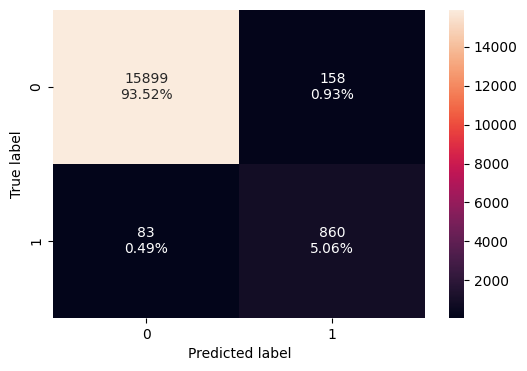

In [185]:
# Plot the confusion matrix for the predictions on training dataset
confusion_matrix_sklearn(y_train, y_train_pred)

In [178]:
# Check the performance on the validation dataset
model_performance_classification_sklearn(final_model, x_val, y_val)

94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


Accuracy   Recall  Precision        F1
0     0.987  0.91018   0.863636  0.886297

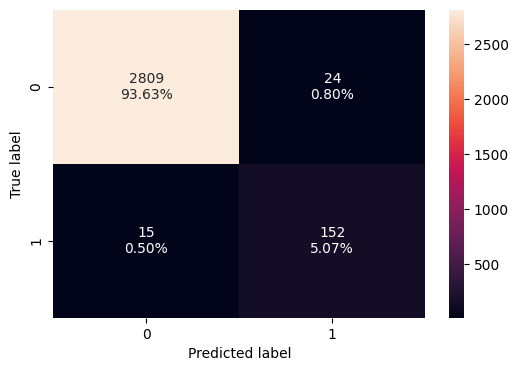

In [186]:
# Plot the confusion matrix for the predictions on validation dataset
confusion_matrix_sklearn(y_val, y_val_pred)

In [179]:
# Check the performance on the testing dataset
model_performance_classification_sklearn(final_model, x_test, y_test)

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


Accuracy    Recall  Precision        F1
0    0.9834  0.879433   0.835017  0.856649

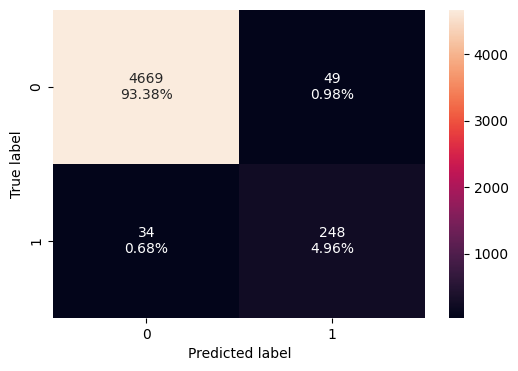

In [187]:
# Plot the confusion matrix for the predictions on test dataset
confusion_matrix_sklearn(y_test, y_test_pred)

* Recall scores on the training and the validation dataset are very close at about 91%
* Recall score on the test dataset is sligtly lower at about 88%
* Final model appears to be slightly overfitting, but is generalizing well on unseen data

Let's check the Recall scores on all the datasets for each target class

In [173]:
# Print the classification report for the predictions on the training dataset
print("Classification Report - Training dataset",end="\n\n")
cr = classification_report(y_train, y_train_pred > 0.5)
print(cr)

Classification Report - Training dataset

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     16057
           1       0.84      0.91      0.88       943

    accuracy                           0.99     17000
   macro avg       0.92      0.95      0.93     17000
weighted avg       0.99      0.99      0.99     17000



On the training dataset:
* Model correctly predicted 99% of the times that the generator will not fail
* Model correctly predicted 91% of the times that the generator will fail

In [174]:
# Print the classification report for the predictions on the validation dataset
print("Classification Report - Validation dataset",end="\n\n")
cr = classification_report(y_val, y_val_pred > 0.5)
print(cr)

Classification Report - Validation dataset

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2833
           1       0.86      0.91      0.89       167

    accuracy                           0.99      3000
   macro avg       0.93      0.95      0.94      3000
weighted avg       0.99      0.99      0.99      3000



On the validation dataset:
* Model correctly predicted 99% of the times that the generator will not fail
* Model correctly predicted 91% of the times that the generator will fail

In [175]:
# Print the classification report for the predictions on the test dataset
print("Classification Report - Test dataset",end="\n\n")
cr = classification_report(y_test, y_test_pred > 0.5)
print(cr)

Classification Report - Test dataset

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4718
           1       0.84      0.88      0.86       282

    accuracy                           0.98      5000
   macro avg       0.91      0.93      0.92      5000
weighted avg       0.98      0.98      0.98      5000



On the test dataset:
* Model correctly predicted 99% of the times that the generator will not fail
* Model correctly predicted 88% of the times that the generator will fail

# **Actionable Insights and Recommendations**

Write down some insights and business recommendations based on your observations.

### Insights

* Many features have almost normal distribution of the data.
* Training data provided has recorded generator failures in only 5.55% of all the records.
* Data has been assumed to be true, as a ciphered version of data has been provided, and no outlier treatment has been performed.
* High correlation was observed for many features in the dataset.
* Feature importances have not been imputed on the dataset as we have not used any classification models.
* Missing data was imputed using median to avoid disruption to the distribution of data.

### Recommendations

* Model 13 has been considered as a final model and recommended to be used to predict generator failures
* It is able to predict 88% of the generator failures
* It predicted only 1% failure obervations that were not truly failures
* Company would have had to spend money on inspection of 1% predictions that may not turn out to be failures
* Company would be saving money by performing repairs instead of replacements on 88% of observations that may result into failures if repairs are not performed on time